# TP4: Decision trees & random forests
The aim of this tutorial is to get familiar with the use of decision trees and their generalizations on simple examples using `scikit-learn` tools.

## Completing your installation first
You will need to install packages `python-graphviz` first. If needed, uncomment the `conda` command below:

In [1]:
# If needed, uncomment the line below:

# pip install graphviz
import os
os.environ['PATH'] += os.pathsep + 'C:/Users/remyd/Downloads/graphviz-2.38/release/bin'

In [2]:
from pylab import *
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.linear_model import LinearRegression

# Load the library with the iris dataset
from sklearn.datasets import load_iris, load_wine

# Load scikit's decision tree classifier
from sklearn import tree

# Load scikit's random forest classifier library
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor

# To visualize trees
import graphviz 

# Load pandas to manipulate data frames (Excel like)
import pandas as pd

# Set random seed
np.random.seed(0)

The data for this tutorial is famous. Called, **the iris dataset**, it contains four variables measuring various parts of iris flowers of three related species, and then a fourth variable with the species name. The reason it is so famous in machine learning and statistics communities is because the data requires very little preprocessing (i.e. no missing values, all features are floating numbers, etc.).

In [3]:
iris = load_iris()

## Step 1: explore the data set
1. What is the structure of the object `iris` ?

2. Plot this dataset in a well chosen set of representations to explore the data.

In [4]:
iris

{'data': array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
  

The object `iris` is a kind of dictionary with an array representing the data, another array with the target (0, 1 or 2), an array with the name of the target and some information about the dataset.

In [5]:
data = sns.load_dataset("iris")
data.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


The dataset is composed of 4 numeric features : sepal_length, sepal_width, petal_length and petal_width. The target is the name of the corresponding species.

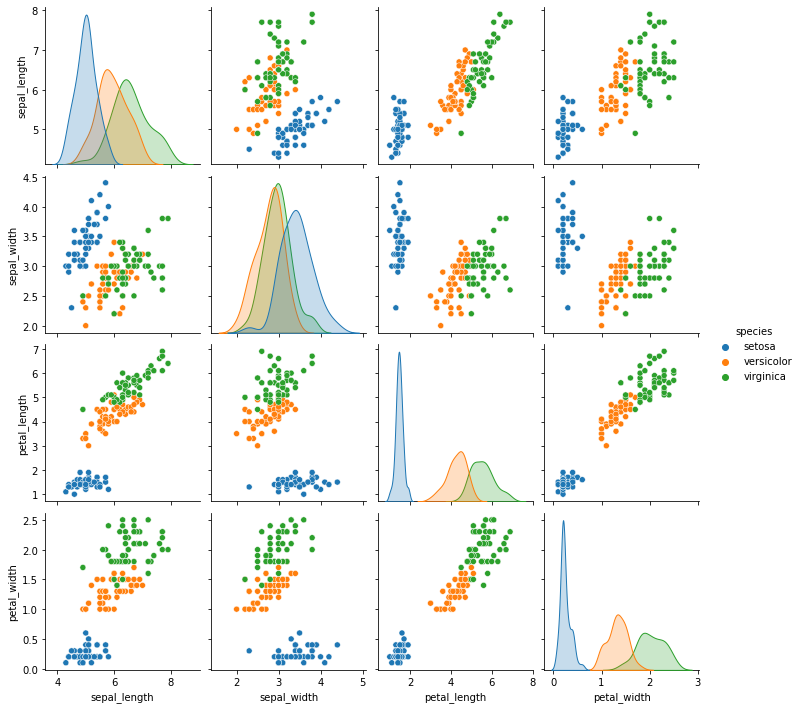

In [6]:
sns.pairplot(data, hue="species")

With that grid, we can easily visualize the distribution of each feature according to the species on the diagonal, and the repartition of these species as a function of 2 features.

By observing the distribution of setosa's petal length and petal width, setosas are easily separable from other species. As a consequence, a simple threshold over one of these features (petal length and petal width) allows to distinguish a setosa from other species.

Distinguishing a versicolor from a virginica looks not as simple, because the distributions are not separable. But according to the repartition of species as a function of petal width and petal length, we observe that the scatterplot corresponding to versicolor can be separated from virginica's scatterplot, with a few errors.

To conclude, the features petal_length and petal_width look the most interesting ones, because they allow to easily separate the species. These 2 features allow to distinguish setosas from other species without any error. sepal_length and sepal_width will probably help to separate versicolor from virginica.

## Using `pandas` to manipulate the data
Pandas is great to manipulate data in a Microsoft Excel like way.

In [7]:
import pandas as pd

# Create a dataframe with the four feature variables
df = pd.DataFrame(iris.data, columns=iris.feature_names)

# View the top 5 rows
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [8]:
# Add a new column with the species names, this is what we are going to try to predict
df['species'] = pd.Categorical.from_codes(iris.target, iris.target_names)

# View the top 5 rows
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


## Step 2: create training and test sets

Create a new column that for each row, generates a random number between 0 and 1, and if that value is less than or equal to .75, then sets the value of that cell as True and false otherwise. This is a quick and dirty way of randomly assigning some rows to be used as the training data and some as the test data.

In [9]:
df['is_train'] = np.random.uniform(0, 1, len(df)) <= .75

# View the top 5 rows
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species,is_train
0,5.1,3.5,1.4,0.2,setosa,True
1,4.9,3.0,1.4,0.2,setosa,True
2,4.7,3.2,1.3,0.2,setosa,True
3,4.6,3.1,1.5,0.2,setosa,True
4,5.0,3.6,1.4,0.2,setosa,True


In [10]:
# Create two new dataframes, one with the training rows, one with the test rows
train, test = df[df['is_train']==True], df[df['is_train']==False]

In [11]:
# Show the number of observations for the test and training dataframes
print('Number of observations in the training data:', len(train))
print('Number of observations in the test data:',len(test))

Number of observations in the training data: 118
Number of observations in the test data: 32


In [12]:
# Create a list of the feature column's names
features = df.columns[:4]

# View features
features

Index(['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)',
       'petal width (cm)'],
      dtype='object')

In [13]:
# train['species'] contains the actual species names. Before we can use it,
# we need to convert each species name into a digit. So, in this case there
# are three species, which have been coded as 0, 1, or 2.
y_train = pd.factorize(train['species'])[0]
y_test = pd.factorize(test['species'])[0]

In [14]:
pd.factorize(train['species'])

(array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2,
        2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
        2, 2, 2, 2, 2, 2, 2, 2], dtype=int64),
 CategoricalIndex(['setosa', 'versicolor', 'virginica'], categories=['setosa', 'versicolor', 'virginica'], ordered=False, dtype='category'))

## Step 3: decision trees for the iris dataset
The method `tree.DecisionTreeClassifier()` from `scikit-learn` builds decision trees objects as follows:

In [15]:
clf = tree.DecisionTreeClassifier()
clf = clf.fit(train[features], y_train)

# Using the hwole dataset you may use directly:
#clf = clf.fit(iris.data, iris.target)

The `export_graphviz` exporter supports a variety of aesthetic options, including coloring nodes by their class (or value for regression) and using explicit variable and class names if desired. Jupyter notebooks also render these plots inline automatically:

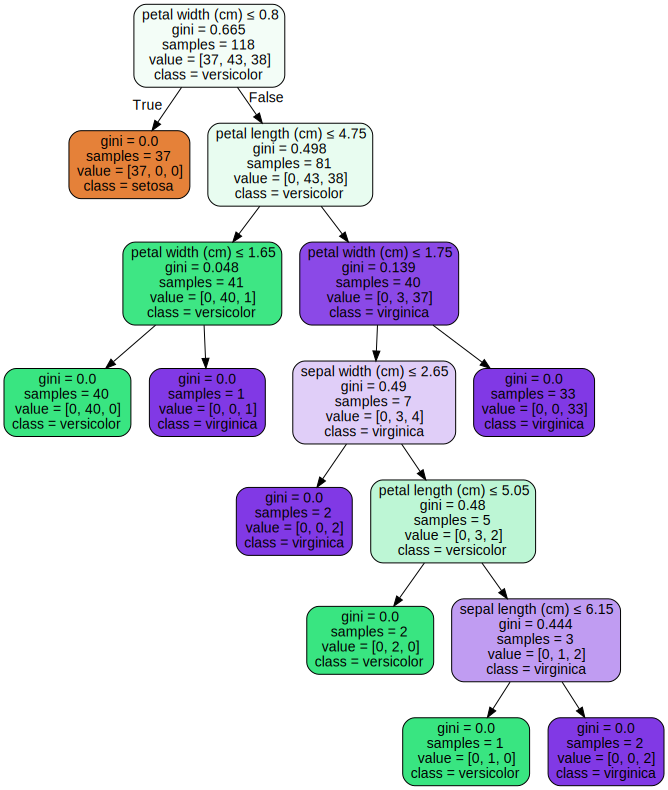

In [16]:
dot_data = tree.export_graphviz(clf, out_file=None, 
                         feature_names=iris.feature_names,  
                         class_names=iris.target_names,  
                         filled=True, rounded=True,  
                         special_characters=True)  
graph = graphviz.Source(dot_data)  
graph 

We can also export the tree in Graphviz format and  savethe resulting graph in an output file iris.pdf:

In [17]:
dot_data = tree.export_graphviz(clf, out_file=None) 
graph = graphviz.Source(dot_data) 
graph.render("iris") 

'iris.pdf'

After being fitted, **the model can then be used to predict the class of samples**:

In [18]:
class_pred = clf.predict(iris.data)
class_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 2, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2], dtype=int64)

## Exercise 1
1. Train the decision tree on the iris dataset and explain how one should read blocks in `graphviz` representation of the tree.

2. Plot the regions of decision with the points of the training set superimposed.

*Indication: you may find the function `plt.contourf` useful.

We observe the tree above. As we said when we explored the data in step 1, the tree first distinguishes setosas from other species, using petal_width. The first question of the tree is "Is the petal width of the flower lower than 0.8 cm ?". 
- If true, we obtain a pure node with setosas. As a consequence, a flower with a petal width lower than 0.8 cm is a setosa. 
- If false, we obtain a node with versicolor and virginica. We need to ask more questions to separate the two species. 

After that, the tree asks question about petal width and petal length. This is logical with our observations during the exploration of data, because we mentioned that features about petal were the most efficient ones in order to distinguish a verginica from a versicolor. But in order to avoid errors and to make a better classification, the tree uses features about sepal as well. Finally, each final node of the tree is pure. 

In [19]:
Nx1=300 # number of samples for display
Nx2=300

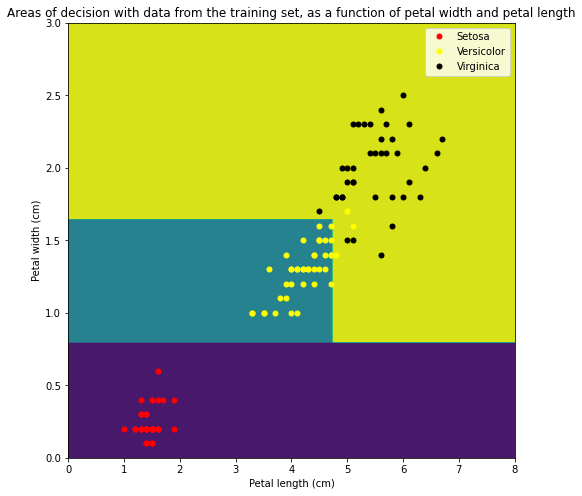

In [20]:
x1=np.linspace(0,8,Nx1)  # sampling of the x1 axis 
x2=np.linspace(0,3,Nx2) 
X1,X2=np.meshgrid(x1,x2) 
Z = clf.predict(np.array([np.zeros(X1.ravel().shape),np.zeros(X1.ravel().shape),X1.ravel(), X2.ravel()]).T)
Z = Z.reshape(X1.shape)

plt.figure(figsize=(8, 8))
plt.contourf(X1,X2, Z)
plt.plot (train[train['species'] == 'setosa']['petal length (cm)'].values,train[train['species'] == 'setosa']['petal width (cm)'].values, linestyle = 'none', marker = 'o', c = 'red', markersize = 5, label = 'Setosa')
plt.plot (train[train['species'] == 'versicolor']['petal length (cm)'].values,train[train['species'] == 'versicolor']['petal width (cm)'].values, linestyle = 'none', marker = 'o', c = 'yellow', markersize = 5, label = 'Versicolor')
plt.plot (train[train['species'] == 'virginica']['petal length (cm)'].values,train[train['species'] == 'virginica']['petal width (cm)'].values, linestyle = 'none', marker = 'o', c = 'black', markersize = 5, label = 'Virginica')
plt.xlabel('Petal length (cm)')
plt.ylabel('Petal width (cm)')
plt.legend()
plt.title("Areas of decision with data from the training set, as a function of petal width and petal length")
plt.show()

We notice that some versicolor points are out of the versicolor area, because the computation of areas of decision is only based on petal length and petal width. We do not take into account sepal features because it is easier to plot these areas in 2 dimensions than 4 dimensions.

In [21]:
pred_train = clf.predict(train[features])
pred_train_names = pd.Categorical.from_codes(pred_train, iris.target_names)
pd.crosstab(train['species'], pred_train_names, rownames=['Actual Species'], colnames=['Predicted Species'])

Predicted Species,setosa,versicolor,virginica
Actual Species,,,
setosa,37,0,0
versicolor,0,43,0
virginica,0,0,38


In [22]:
print("{:.2%}".format(accuracy_score(y_train, pred_train)))

100.00%


The decision tree does not make any error on the training set.

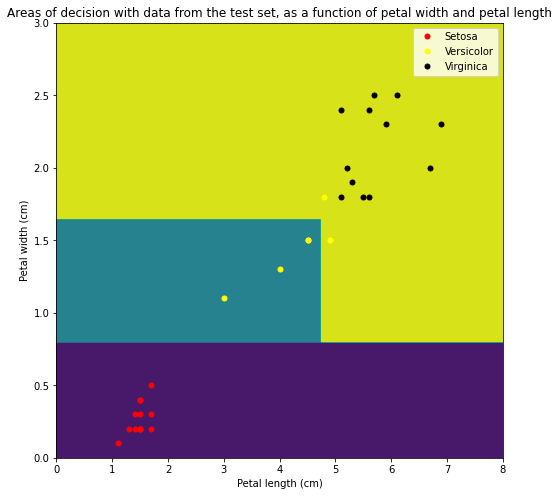

In [23]:
x1=np.linspace(0,8,Nx1)  # sampling of the x1 axis 
x2=np.linspace(0,3,Nx2) 
X1,X2=np.meshgrid(x1,x2) 
Z = clf.predict(np.array([np.zeros(X1.ravel().shape),np.zeros(X1.ravel().shape),X1.ravel(), X2.ravel()]).T)
Z = Z.reshape(X1.shape)

plt.figure(figsize=(8, 8))
plt.contourf(X1,X2, Z)
plt.plot (test[test['species'] == 'setosa']['petal length (cm)'].values,test[test['species'] == 'setosa']['petal width (cm)'].values, linestyle = 'none', marker = 'o', c = 'red', markersize = 5, label = 'Setosa')
plt.plot (test[test['species'] == 'versicolor']['petal length (cm)'].values,test[test['species'] == 'versicolor']['petal width (cm)'].values, linestyle = 'none', marker = 'o', c = 'yellow', markersize = 5, label = 'Versicolor')
plt.plot (test[test['species'] == 'virginica']['petal length (cm)'].values,test[test['species'] == 'virginica']['petal width (cm)'].values, linestyle = 'none', marker = 'o', c = 'black', markersize = 5, label = 'Virginica')
plt.xlabel('Petal length (cm)')
plt.ylabel('Petal width (cm)')
plt.legend()
plt.title("Areas of decision with data from the test set, as a function of petal width and petal length")
plt.show()

In [24]:
pred_test = clf.predict(test[features])
pred_test_names = pd.Categorical.from_codes(pred_test, iris.target_names)
pd.crosstab(test['species'], pred_test_names, rownames=['Actual Species'], colnames=['Predicted Species'])

Predicted Species,setosa,versicolor,virginica
Actual Species,,,
setosa,13,0,0
versicolor,0,5,2
virginica,0,0,12


In [25]:
print("{:.2%}".format(accuracy_score(y_test, pred_test)))

93.75%


The model makes 2 errors on the test set. Indeed, there are 2 confusions between versicolor and virginica. This is logical with our observation during data exploration : virginica and versicolor can be similar species, regarding to the features used in this problem.

Text(0.5, 1.0, 'Feature importance')

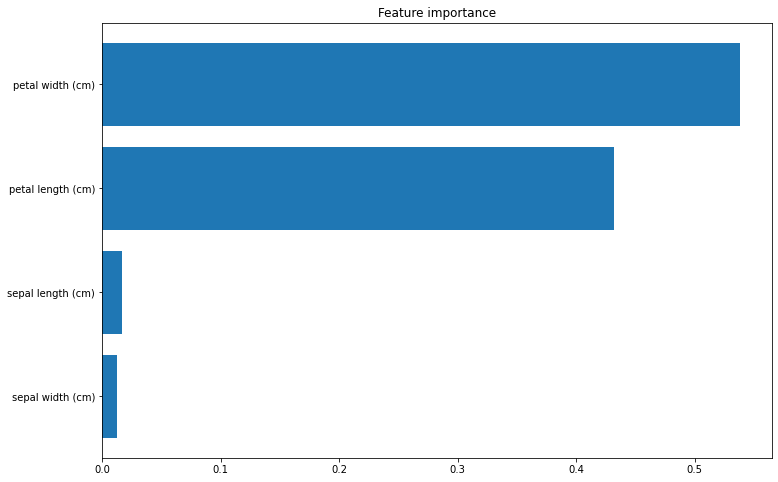

In [26]:
importances = clf.feature_importances_
indices = np.argsort(importances)
plt.figure(figsize=(12,8))
plt.barh(range(len(indices)), importances[indices], align='center')
plt.yticks(range(len(indices)), df.columns[indices])
plt.title('Feature importance')

The importance of features confirms our first observation : features about petals are the most discriminant ones, and features about sepals help in the final decision.

## Exercise 2
1. Build 2 different trees based on a sepal features (sepal lengths, sepal widths) vs petal features (petal lengths, petal widths) only: which features are the most discriminant?

2. Compare performances with those obtained using all features.

3. Try the same as above using the various splitting criterion available, Gini's index, classification error or cross-entropy. Comment on your results. 

In [27]:
sepal = df.columns[:2]
petal = df.columns[2:4]

#### Sepal features

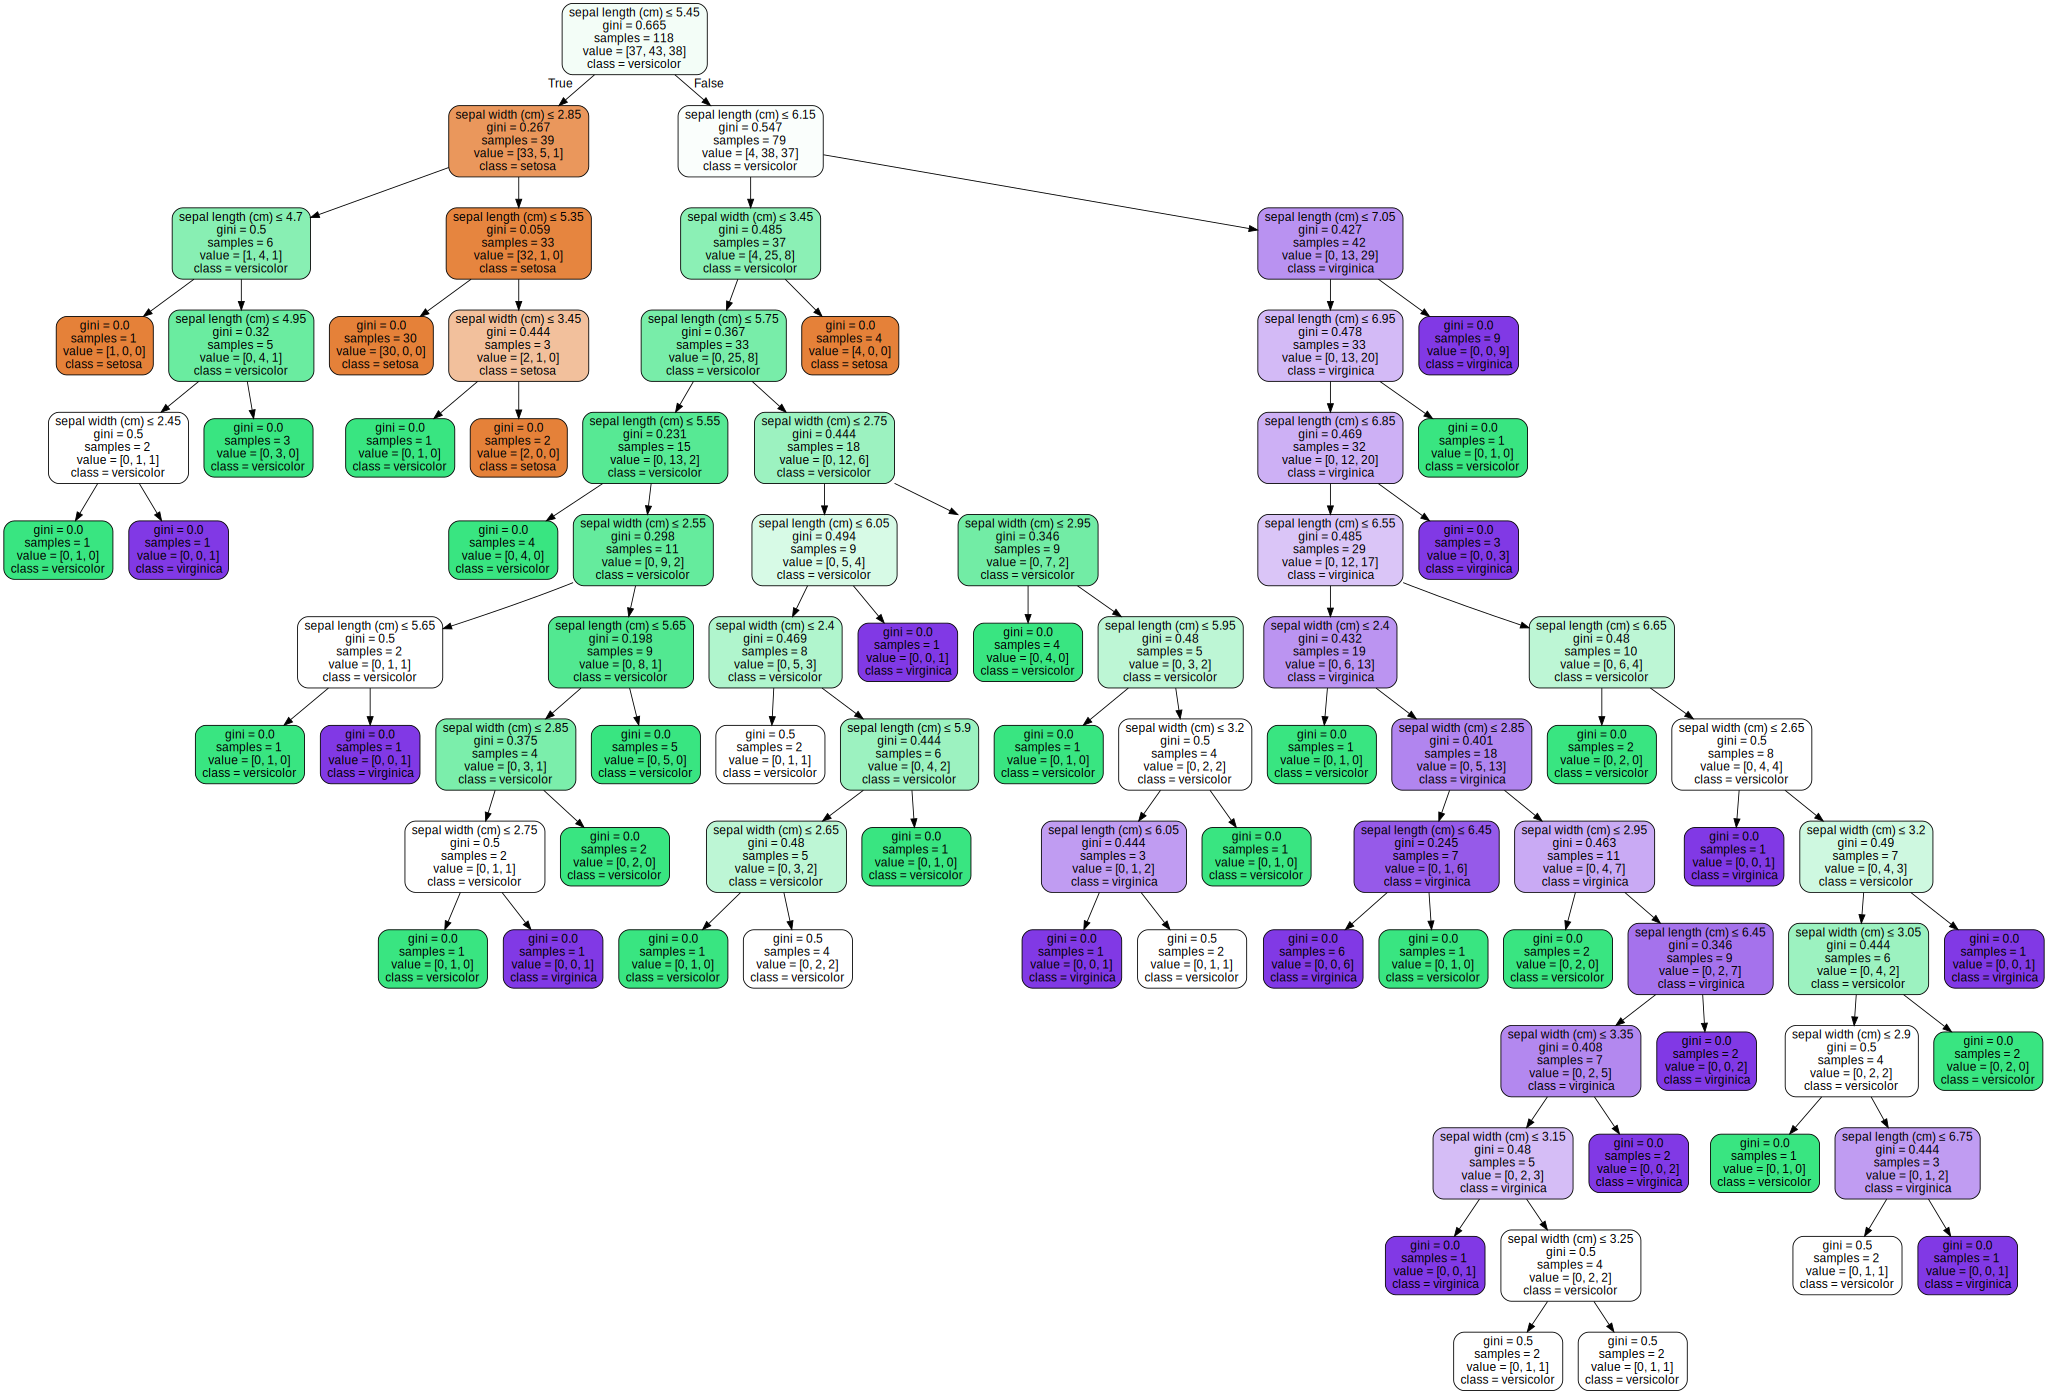

In [28]:
clf_sepal = tree.DecisionTreeClassifier()
clf_sepal = clf_sepal.fit(train[sepal], y_train)

dot_data = tree.export_graphviz(clf_sepal, out_file=None, 
                         feature_names=iris.feature_names[:2],  
                         class_names=iris.target_names,  
                         filled=True, rounded=True,  
                         special_characters=True)  
graph = graphviz.Source(dot_data)  
graph 

With sepal features, we obtain a deeper and more complex tree than in exercise 1. As it is more difficult to separate the species with sepal features only, we need to ask more question to have an idea of the identity of the flower. It could lead to overfitting. We notice that some final nodes are not pure. The model is going to make some errors on training set.

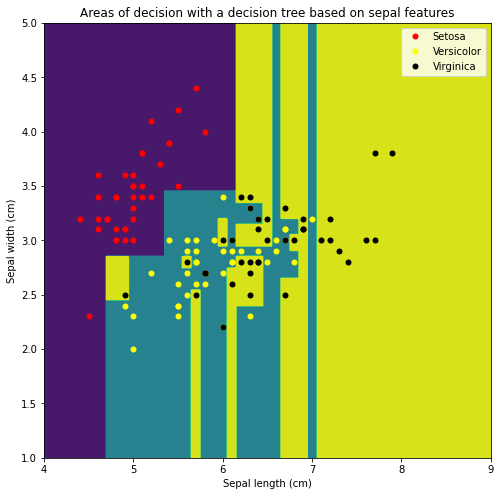

In [29]:
x1=np.linspace(4,9,Nx1)  # sampling of the x1 axis 
x2=np.linspace(1,5,Nx2) 
X1,X2=np.meshgrid(x1,x2) 
Z = clf_sepal.predict(np.array([X1.ravel(), X2.ravel()]).T)
Z = Z.reshape(X1.shape)

plt.figure(figsize=(8, 8))
plt.contourf(X1,X2, Z)
plt.plot (train[train['species'] == 'setosa']['sepal length (cm)'].values,train[train['species'] == 'setosa']['sepal width (cm)'].values, linestyle = 'none', marker = 'o', c = 'red', markersize = 5, label = 'Setosa')
plt.plot (train[train['species'] == 'versicolor']['sepal length (cm)'].values,train[train['species'] == 'versicolor']['sepal width (cm)'].values, linestyle = 'none', marker = 'o', c = 'yellow', markersize = 5, label = 'Versicolor')
plt.plot (train[train['species'] == 'virginica']['sepal length (cm)'].values,train[train['species'] == 'virginica']['sepal width (cm)'].values, linestyle = 'none', marker = 'o', c = 'black', markersize = 5, label = 'Virginica')
plt.xlabel('Sepal length (cm)')
plt.ylabel('Sepal width (cm)')
plt.legend()
plt.title("Areas of decision with a decision tree based on sepal features")
plt.show()

As the tree is more complex, the areas of decision are not as simple as those in exercise 1. They look more sophisticated, but it looks like a phenomenon of overfitting. Indeed, for example, we notice a strip corresponding to versicolor for a sepal length around 7 cm, created for 1 observation only.

In [30]:
pred_train = clf_sepal.predict(train[sepal])
pred_train_names = pd.Categorical.from_codes(pred_train, iris.target_names)
pd.crosstab(train['species'], pred_train_names, rownames=['Actual Species'], colnames=['Predicted Species'])

Predicted Species,setosa,versicolor,virginica
Actual Species,,,
setosa,37,0,0
versicolor,0,43,0
virginica,0,7,31


In [31]:
print("{:.2%}".format(accuracy_score(y_train, pred_train)))

94.07%


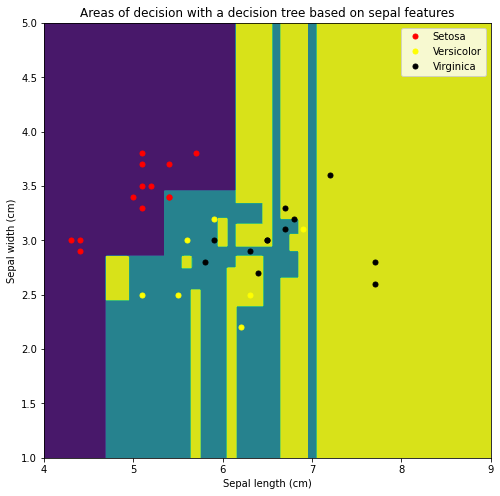

In [32]:
x1=np.linspace(4,9,Nx1)  # sampling of the x1 axis 
x2=np.linspace(1,5,Nx2) 
X1,X2=np.meshgrid(x1,x2) 
Z = clf_sepal.predict(np.array([X1.ravel(), X2.ravel()]).T)
Z = Z.reshape(X1.shape)

plt.figure(figsize=(8, 8))
plt.contourf(X1,X2, Z)
plt.plot (test[test['species'] == 'setosa']['sepal length (cm)'].values,test[test['species'] == 'setosa']['sepal width (cm)'].values, linestyle = 'none', marker = 'o', c = 'red', markersize = 5, label = 'Setosa')
plt.plot (test[test['species'] == 'versicolor']['sepal length (cm)'].values,test[test['species'] == 'versicolor']['sepal width (cm)'].values, linestyle = 'none', marker = 'o', c = 'yellow', markersize = 5, label = 'Versicolor')
plt.plot (test[test['species'] == 'virginica']['sepal length (cm)'].values,test[test['species'] == 'virginica']['sepal width (cm)'].values, linestyle = 'none', marker = 'o', c = 'black', markersize = 5, label = 'Virginica')
plt.xlabel('Sepal length (cm)')
plt.ylabel('Sepal width (cm)')
plt.legend()
plt.title("Areas of decision with a decision tree based on sepal features")
plt.show()

In [33]:
pred_test = clf_sepal.predict(test[sepal])
pred_test_names = pd.Categorical.from_codes(pred_test, iris.target_names)
pd.crosstab(test['species'], pred_test_names, rownames=['Actual Species'], colnames=['Predicted Species'])

Predicted Species,setosa,versicolor,virginica
Actual Species,,,
setosa,11,2,0
versicolor,0,5,2
virginica,0,4,8


In [34]:
print("{:.2%}".format(accuracy_score(y_test, pred_test)))

75.00%


The accuracy score on test set is widely lower than the score on training set. This result confirms our first impression : the model is overfitted.

#### Petal features

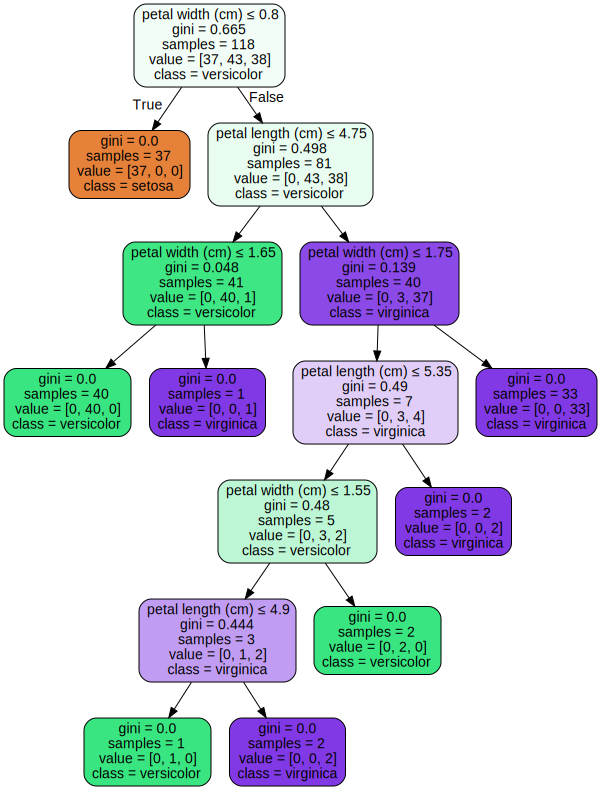

In [35]:
clf_petal = tree.DecisionTreeClassifier()
clf_petal = clf_petal.fit(train[petal], y_train)

dot_data = tree.export_graphviz(clf_petal, out_file=None, 
                         feature_names=iris.feature_names[2:],  
                         class_names=iris.target_names,  
                         filled=True, rounded=True,  
                         special_characters=True)  
graph = graphviz.Source(dot_data)  
graph 

The tree is simpler than the tree based on sepal features. In addition, it has the same depth than the tree in exercise 1. Each final node is pure, it was not the case in the previous tree. The model won't make any error on training set.

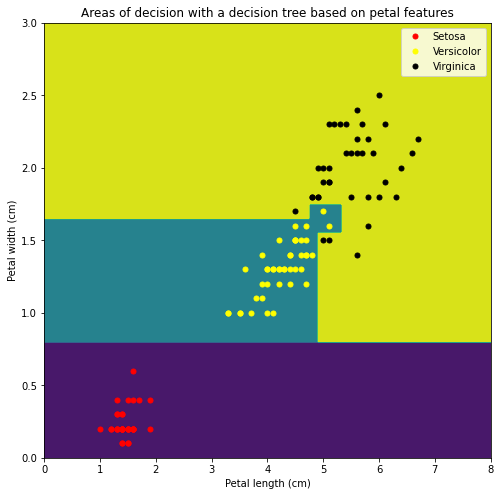

In [36]:
x1=np.linspace(0,8,Nx1)  # sampling of the x1 axis 
x2=np.linspace(0,3,Nx2) 
X1,X2=np.meshgrid(x1,x2) 
X1,X2=np.meshgrid(x1,x2) 
Z = clf_petal.predict(np.array([X1.ravel(), X2.ravel()]).T)
Z = Z.reshape(X1.shape)

plt.figure(figsize=(8, 8))
plt.contourf(X1,X2,Z)
plt.plot (train[train['species'] == 'setosa']['petal length (cm)'].values,train[train['species'] == 'setosa']['petal width (cm)'].values, linestyle = 'none', marker = 'o', c = 'red', markersize = 5, label = 'Setosa')
plt.plot (train[train['species'] == 'versicolor']['petal length (cm)'].values,train[train['species'] == 'versicolor']['petal width (cm)'].values, linestyle = 'none', marker = 'o', c = 'yellow', markersize = 5, label = 'Versicolor')
plt.plot (train[train['species'] == 'virginica']['petal length (cm)'].values,train[train['species'] == 'virginica']['petal width (cm)'].values, linestyle = 'none', marker = 'o', c = 'black', markersize = 5, label = 'Virginica')
plt.xlabel('Petal length (cm)')
plt.ylabel('Petal width (cm)')
plt.legend()
plt.title("Areas of decision with a decision tree based on petal features")
plt.show()

We obtain very simple areas of decision, and a classification without any error.

In [37]:
pred_train = clf_petal.predict(train[petal])
pred_train_names = pd.Categorical.from_codes(pred_train, iris.target_names)
pd.crosstab(train['species'], pred_train_names, rownames=['Actual Species'], colnames=['Predicted Species'])

Predicted Species,setosa,versicolor,virginica
Actual Species,,,
setosa,37,0,0
versicolor,0,43,0
virginica,0,0,38


In [38]:
print("{:.2%}".format(accuracy_score(y_train, pred_train)))

100.00%


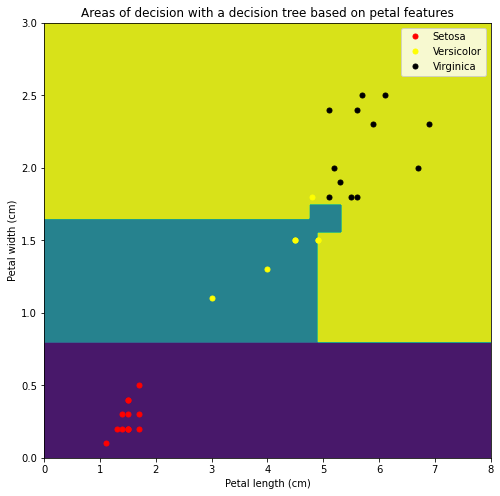

In [39]:
x1=np.linspace(0,8,Nx1)  # sampling of the x1 axis 
x2=np.linspace(0,3,Nx2) 
X1,X2=np.meshgrid(x1,x2) 
X1,X2=np.meshgrid(x1,x2) 
Z = clf_petal.predict(np.array([X1.ravel(), X2.ravel()]).T)
Z = Z.reshape(X1.shape)

plt.figure(figsize=(8, 8))
plt.contourf(X1,X2,Z)
plt.plot (test[test['species'] == 'setosa']['petal length (cm)'].values,test[test['species'] == 'setosa']['petal width (cm)'].values, linestyle = 'none', marker = 'o', c = 'red', markersize = 5, label = 'Setosa')
plt.plot (test[test['species'] == 'versicolor']['petal length (cm)'].values,test[test['species'] == 'versicolor']['petal width (cm)'].values, linestyle = 'none', marker = 'o', c = 'yellow', markersize = 5, label = 'Versicolor')
plt.plot (test[test['species'] == 'virginica']['petal length (cm)'].values,test[test['species'] == 'virginica']['petal width (cm)'].values, linestyle = 'none', marker = 'o', c = 'black', markersize = 5, label = 'Virginica')
plt.xlabel('Petal length (cm)')
plt.ylabel('Petal width (cm)')
plt.legend()
plt.title("Areas of decision with a decision tree based on petal features")
plt.show()

In [40]:
pred_test = clf_petal.predict(test[petal])
pred_test_names = pd.Categorical.from_codes(pred_test, iris.target_names)
pd.crosstab(test['species'], pred_test_names, rownames=['Actual Species'], colnames=['Predicted Species'])

Predicted Species,setosa,versicolor,virginica
Actual Species,,,
setosa,13,0,0
versicolor,0,6,1
virginica,0,0,12


In [41]:
print("{:.2%}".format(accuracy_score(y_test, pred_test)))

96.88%


We just have one error on test set, a confusion between versicolor and virginica. The model has a good power of prediction and generalizes well the data. In addition, the model has a better performance than the model in exercise 1, with 4 features. As a consequence, by reducing the dimension, from 4 to 2, and by selecting the most discriminant features (petal length and petal width), we improved the performance of the model.

### Splitting with cross-entropy criterion

#### Sepal features

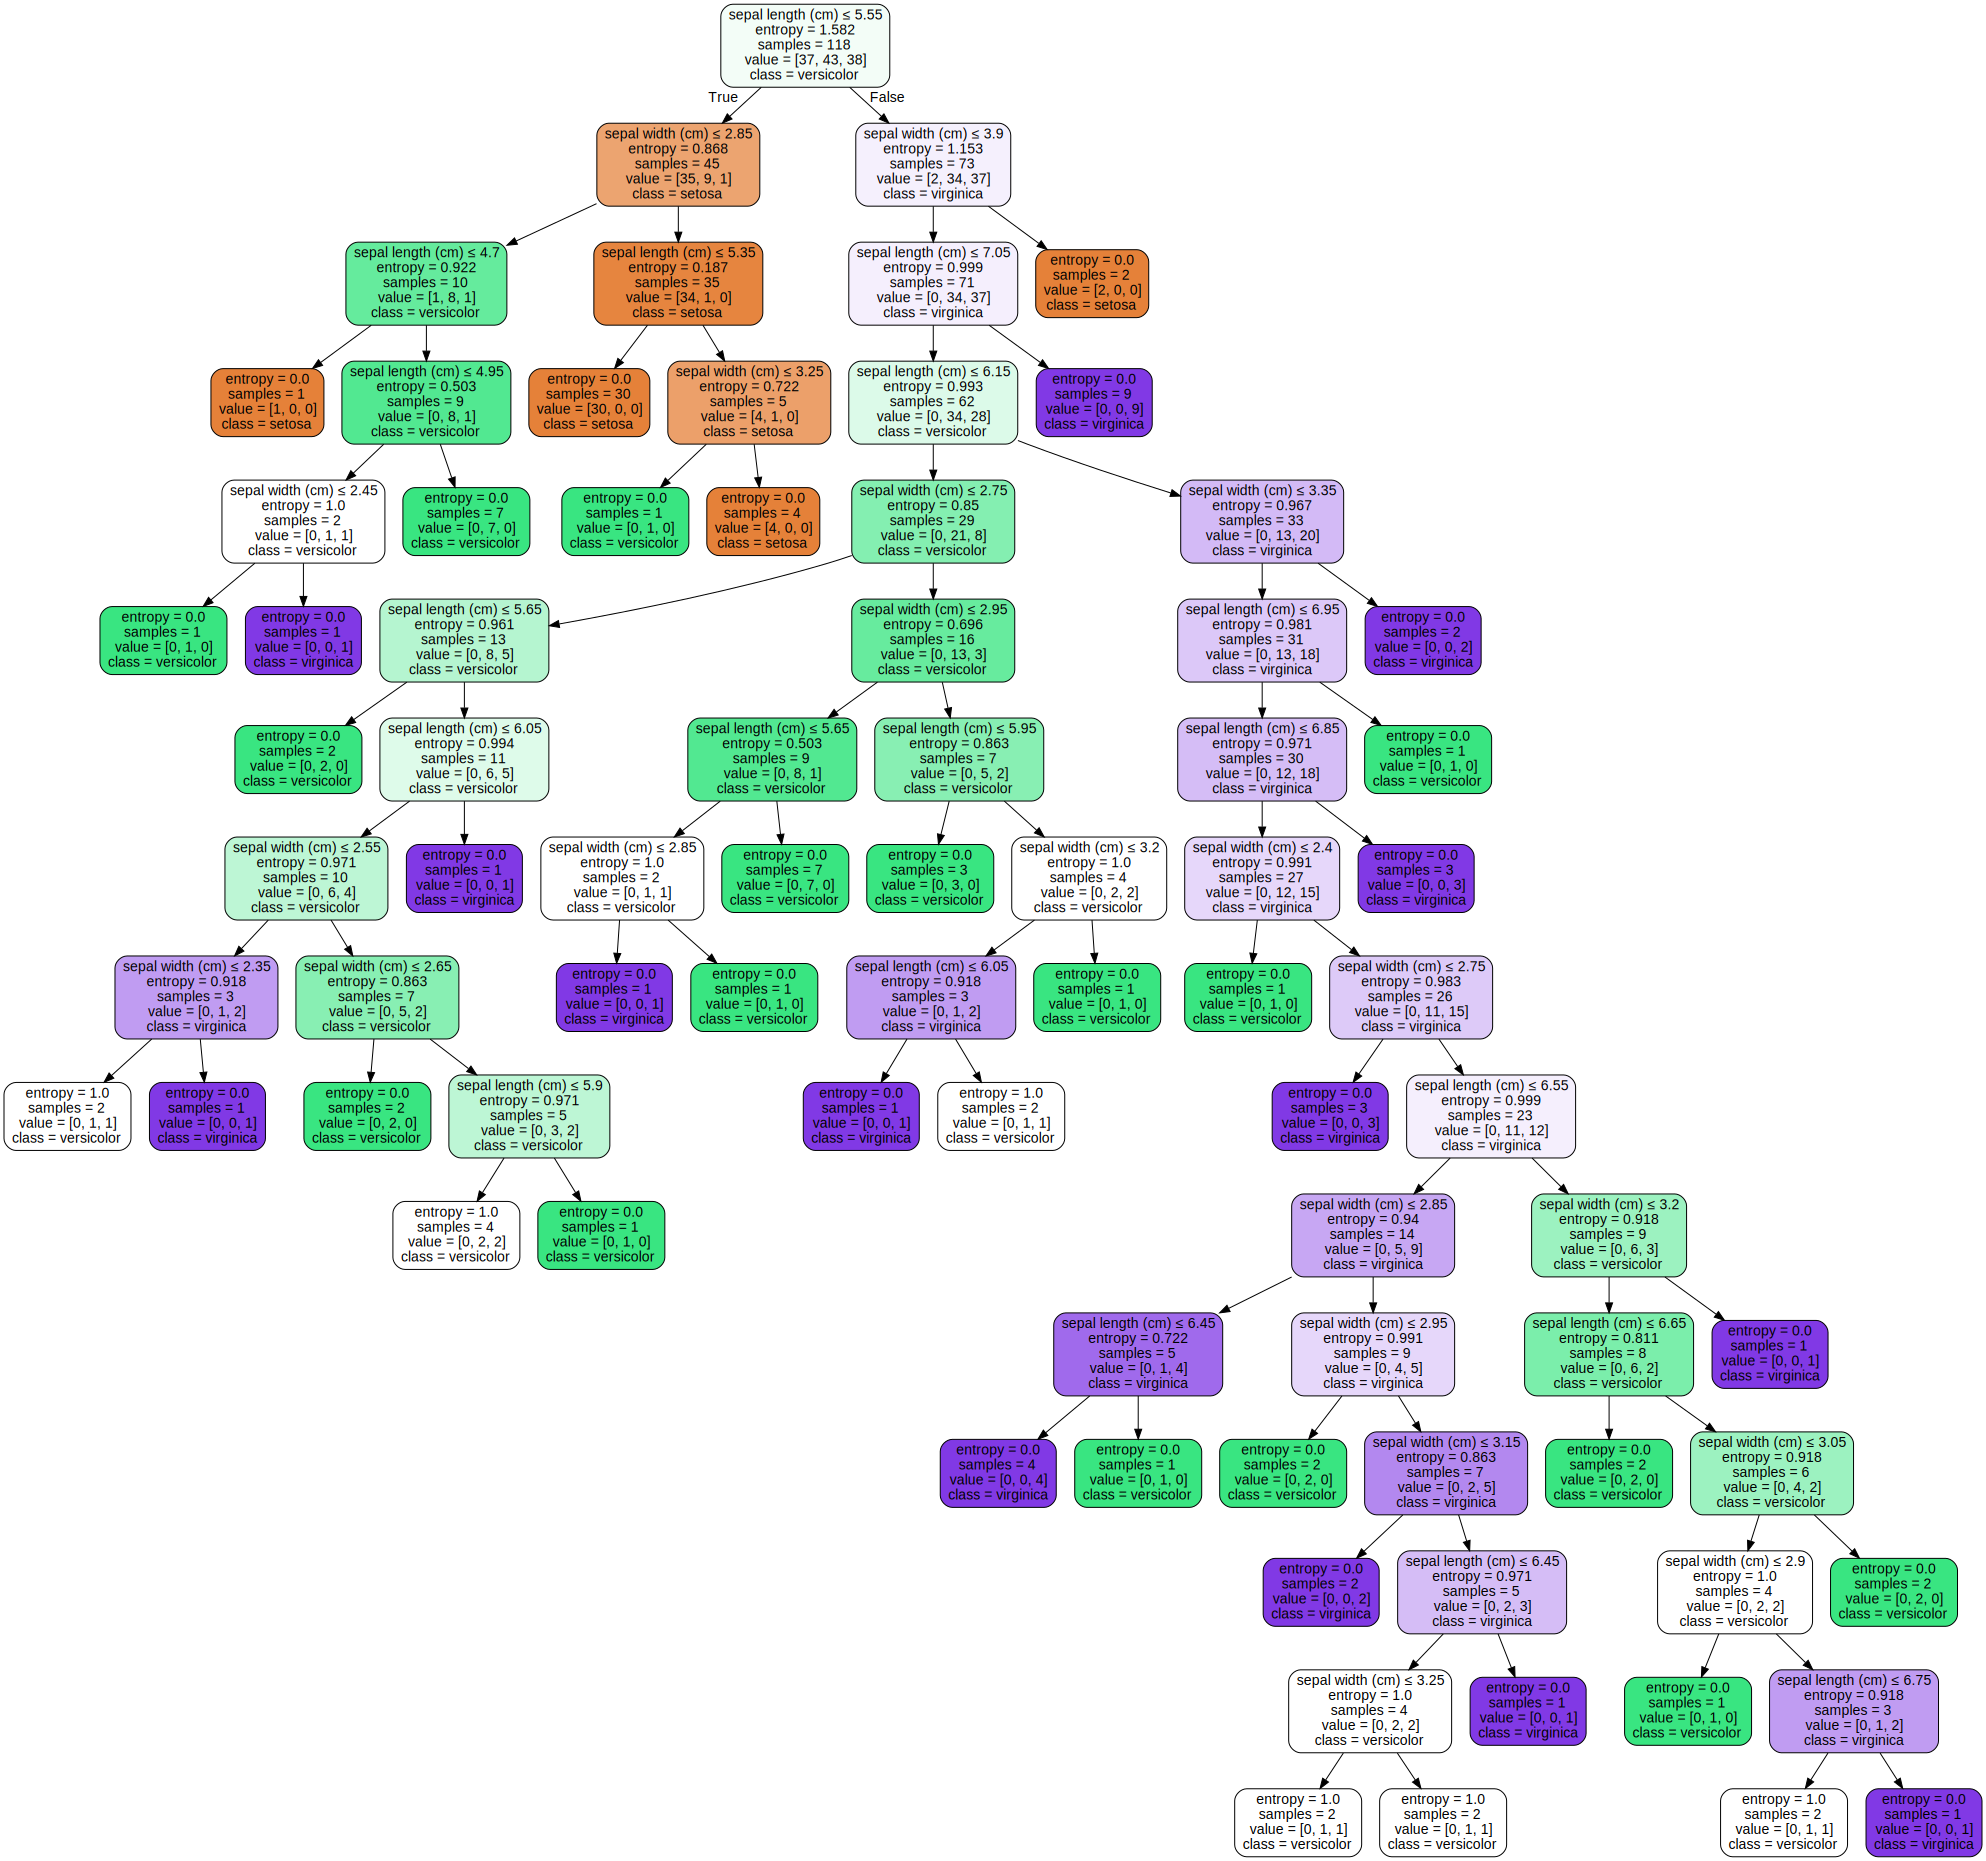

In [42]:
clf_sepal = tree.DecisionTreeClassifier(criterion = 'entropy')
clf_sepal = clf_sepal.fit(train[sepal], y_train)

dot_data = tree.export_graphviz(clf_sepal, out_file=None, 
                         feature_names=iris.feature_names[:2],  
                         class_names=iris.target_names,  
                         filled=True, rounded=True,  
                         special_characters=True)  
graph = graphviz.Source(dot_data)  
graph 

We obtain a tree even more complex and deeper than the tree we built by splitting with Gini criterion.

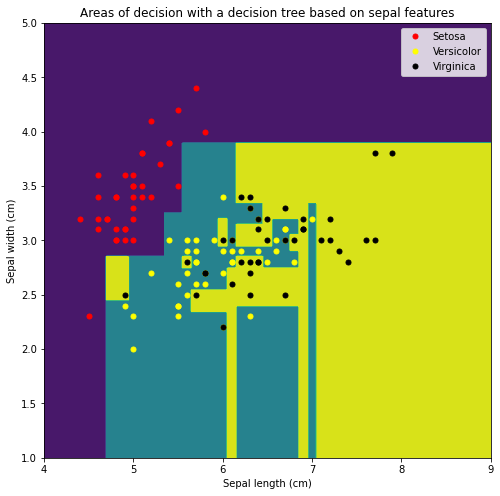

In [43]:
x1=np.linspace(4,9,Nx1)  # sampling of the x1 axis 
x2=np.linspace(1,5,Nx2) 
X1,X2=np.meshgrid(x1,x2) 
Z = clf_sepal.predict(np.array([X1.ravel(), X2.ravel()]).T)
Z = Z.reshape(X1.shape)

plt.figure(figsize=(8, 8))
plt.contourf(X1,X2, Z)
plt.plot (train[train['species'] == 'setosa']['sepal length (cm)'].values,train[train['species'] == 'setosa']['sepal width (cm)'].values, linestyle = 'none', marker = 'o', c = 'red', markersize = 5, label = 'Setosa')
plt.plot (train[train['species'] == 'versicolor']['sepal length (cm)'].values,train[train['species'] == 'versicolor']['sepal width (cm)'].values, linestyle = 'none', marker = 'o', c = 'yellow', markersize = 5, label = 'Versicolor')
plt.plot (train[train['species'] == 'virginica']['sepal length (cm)'].values,train[train['species'] == 'virginica']['sepal width (cm)'].values, linestyle = 'none', marker = 'o', c = 'black', markersize = 5, label = 'Virginica')
plt.xlabel('Sepal length (cm)')
plt.ylabel('Sepal width (cm)')
plt.legend()
plt.title("Areas of decision with a decision tree based on sepal features")
plt.show()

As the tree is different, areas of decision change as well. For instance, the area correspoding to setosa is bigger. Areas corresponding to versicolor and virginica are complex and sometimes there is a band for one point only.

In [44]:
pred_train = clf_sepal.predict(train[sepal])
pred_train_names = pd.Categorical.from_codes(pred_train, iris.target_names)
pd.crosstab(train['species'], pred_train_names, rownames=['Actual Species'], colnames=['Predicted Species'])

Predicted Species,setosa,versicolor,virginica
Actual Species,,,
setosa,37,0,0
versicolor,0,43,0
virginica,0,7,31


In [45]:
print("{:.2%}".format(accuracy_score(y_train, pred_train)))

94.07%


The accuracy score on training set is exactly the same, whatever the splitting method (Gini or cross-entropy), even if the tree and areas of decision are different.

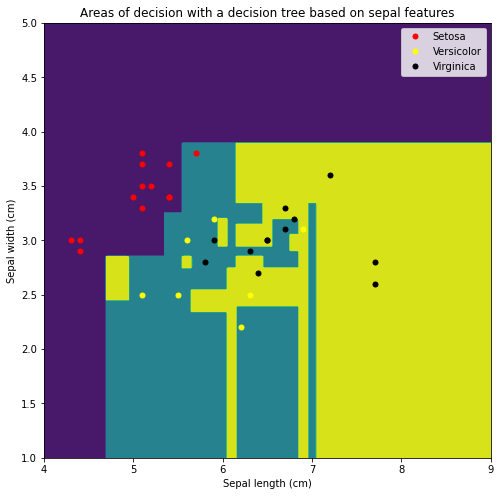

In [46]:
x1=np.linspace(4,9,Nx1)  # sampling of the x1 axis 
x2=np.linspace(1,5,Nx2) 
X1,X2=np.meshgrid(x1,x2) 
Z = clf_sepal.predict(np.array([X1.ravel(), X2.ravel()]).T)
Z = Z.reshape(X1.shape)

plt.figure(figsize=(8, 8))
plt.contourf(X1,X2, Z)
plt.plot (test[test['species'] == 'setosa']['sepal length (cm)'].values,test[test['species'] == 'setosa']['sepal width (cm)'].values, linestyle = 'none', marker = 'o', c = 'red', markersize = 5, label = 'Setosa')
plt.plot (test[test['species'] == 'versicolor']['sepal length (cm)'].values,test[test['species'] == 'versicolor']['sepal width (cm)'].values, linestyle = 'none', marker = 'o', c = 'yellow', markersize = 5, label = 'Versicolor')
plt.plot (test[test['species'] == 'virginica']['sepal length (cm)'].values,test[test['species'] == 'virginica']['sepal width (cm)'].values, linestyle = 'none', marker = 'o', c = 'black', markersize = 5, label = 'Virginica')
plt.xlabel('Sepal length (cm)')
plt.ylabel('Sepal width (cm)')
plt.legend()
plt.title("Areas of decision with a decision tree based on sepal features")
plt.show()

In [47]:
pred_test = clf_sepal.predict(test[sepal])
pred_test_names = pd.Categorical.from_codes(pred_test, iris.target_names)
pd.crosstab(test['species'], pred_test_names, rownames=['Actual Species'], colnames=['Predicted Species'])

Predicted Species,setosa,versicolor,virginica
Actual Species,,,
setosa,12,1,0
versicolor,0,5,2
virginica,0,4,8


In [48]:
print("{:.2%}".format(accuracy_score(y_test, pred_test)))

78.12%


The model with cross-entropy method makes just one more good prediction than the model with Gini method, on the test set. The performances are very close.

#### Petal features

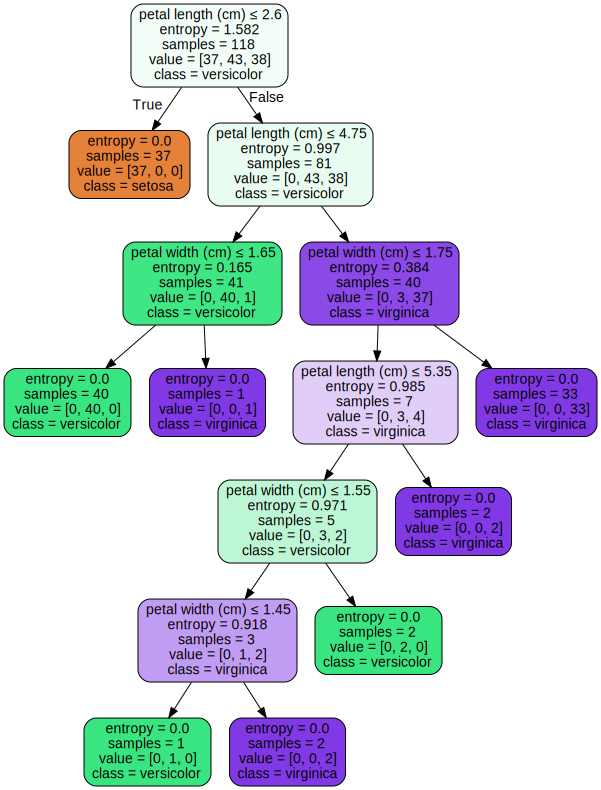

In [49]:
clf_petal = tree.DecisionTreeClassifier(criterion = 'entropy')
clf_petal = clf_petal.fit(train[petal], y_train)

dot_data = tree.export_graphviz(clf_petal, out_file=None, 
                         feature_names=iris.feature_names[2:],  
                         class_names=iris.target_names,  
                         filled=True, rounded=True,  
                         special_characters=True)  
graph = graphviz.Source(dot_data)  
graph 

The tree we obtain with entropy criterion is very similar to the tree we built with Gini. There is a change in the last question of the tree : it concerned the petal length with Gini, and with entropy it concerns the petal width.

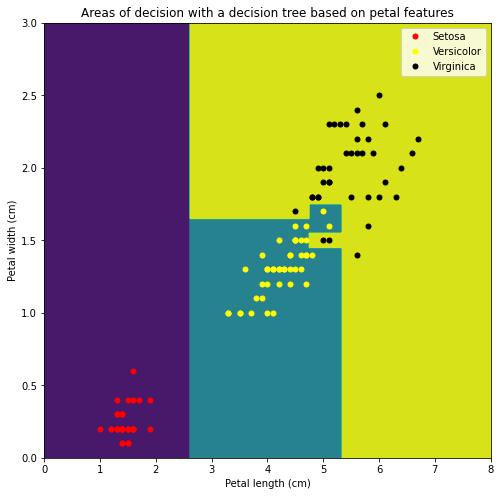

In [50]:
x1=np.linspace(0,8,Nx1)  # sampling of the x1 axis 
x2=np.linspace(0,3,Nx2) 
X1,X2=np.meshgrid(x1,x2) 
X1,X2=np.meshgrid(x1,x2) 
Z = clf_petal.predict(np.array([X1.ravel(), X2.ravel()]).T)
Z = Z.reshape(X1.shape)

plt.figure(figsize=(8, 8))
plt.contourf(X1,X2,Z)
plt.plot (train[train['species'] == 'setosa']['petal length (cm)'].values,train[train['species'] == 'setosa']['petal width (cm)'].values, linestyle = 'none', marker = 'o', c = 'red', markersize = 5, label = 'Setosa')
plt.plot (train[train['species'] == 'versicolor']['petal length (cm)'].values,train[train['species'] == 'versicolor']['petal width (cm)'].values, linestyle = 'none', marker = 'o', c = 'yellow', markersize = 5, label = 'Versicolor')
plt.plot (train[train['species'] == 'virginica']['petal length (cm)'].values,train[train['species'] == 'virginica']['petal width (cm)'].values, linestyle = 'none', marker = 'o', c = 'black', markersize = 5, label = 'Virginica')
plt.xlabel('Petal length (cm)')
plt.ylabel('Petal width (cm)')
plt.legend()
plt.title("Areas of decision with a decision tree based on petal features")
plt.show()

As trees are similar, areas of decision are quite the same. The last question of the tree has a consequence on the boundary between versicolor and virginica, when the petal length is close to 5 cm.

In [51]:
pred_train = clf_petal.predict(train[petal])
pred_train_names = pd.Categorical.from_codes(pred_train, iris.target_names)
pd.crosstab(train['species'], pred_train_names, rownames=['Actual Species'], colnames=['Predicted Species'])

Predicted Species,setosa,versicolor,virginica
Actual Species,,,
setosa,37,0,0
versicolor,0,43,0
virginica,0,0,38


In [52]:
print("{:.2%}".format(accuracy_score(y_train, pred_train)))

100.00%


The model does not make any error on training set, whatever the splitting method.

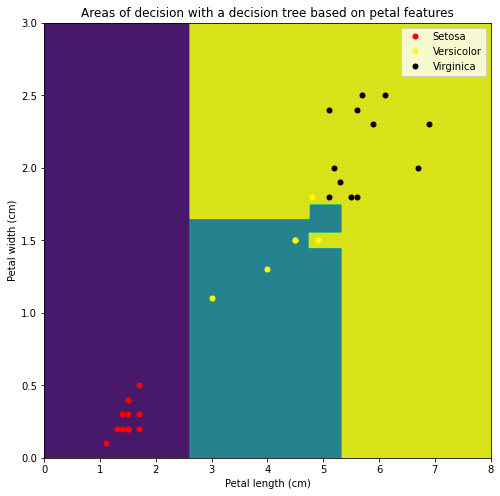

In [53]:
x1=np.linspace(0,8,Nx1)  # sampling of the x1 axis 
x2=np.linspace(0,3,Nx2) 
X1,X2=np.meshgrid(x1,x2) 
X1,X2=np.meshgrid(x1,x2) 
Z = clf_petal.predict(np.array([X1.ravel(), X2.ravel()]).T)
Z = Z.reshape(X1.shape)

plt.figure(figsize=(8, 8))
plt.contourf(X1,X2,Z)
plt.plot (test[test['species'] == 'setosa']['petal length (cm)'].values,test[test['species'] == 'setosa']['petal width (cm)'].values, linestyle = 'none', marker = 'o', c = 'red', markersize = 5, label = 'Setosa')
plt.plot (test[test['species'] == 'versicolor']['petal length (cm)'].values,test[test['species'] == 'versicolor']['petal width (cm)'].values, linestyle = 'none', marker = 'o', c = 'yellow', markersize = 5, label = 'Versicolor')
plt.plot (test[test['species'] == 'virginica']['petal length (cm)'].values,test[test['species'] == 'virginica']['petal width (cm)'].values, linestyle = 'none', marker = 'o', c = 'black', markersize = 5, label = 'Virginica')
plt.xlabel('Petal length (cm)')
plt.ylabel('Petal width (cm)')
plt.legend()
plt.title("Areas of decision with a decision tree based on petal features")
plt.show()

In [54]:
pred_test = clf_petal.predict(test[petal])
pred_test_names = pd.Categorical.from_codes(pred_test, iris.target_names)
pd.crosstab(test['species'], pred_test_names, rownames=['Actual Species'], colnames=['Predicted Species'])

Predicted Species,setosa,versicolor,virginica
Actual Species,,,
setosa,13,0,0
versicolor,0,4,3
virginica,0,0,12


In [55]:
print("{:.2%}".format(accuracy_score(y_test, pred_test)))

90.62%


The model makes 2 more errors than with Gini criterion.

To conclude, the splitting method affects the way of building trees and, as a consequence, the shape of the areas of decision. But finally, the performances are very close and the best method depends on the problem. Indeed, with sepal features, the best method is entropy criterion (1 more good prediction on test set) and with petal features, the best method is Gini criterion (2 more good predictions on test set). So the different splitting methods need to be tested before choosing the splitting method for our model.

### Going further ahead (not mandatory) 
Try the same approach adapted to another toy dataset from `scikit-learn` described at:
http://scikit-learn.org/stable/datasets/index.html

Play with another dataset available at:
http://archive.ics.uci.edu/ml/datasets.html

Let's try this method on a wine classification dataset :

In [56]:
wine = load_wine()
data_w = pd.DataFrame(wine.data,columns = wine.feature_names)
data_w['class'] = wine.target
np.random.seed(150)
data_w['is_train'] = np.random.uniform(0, 1, len(data_w)) <= .75

# View the top 5 rows
data_w.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,class,is_train
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0,False
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0,True
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0,False
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0,True
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0,True


In [57]:
train_w, test_w = data_w[data_w['is_train']==True], data_w[data_w['is_train']==False]
print('Number of observations in the training data:', len(train_w))
print('Number of observations in the test data:',len(test_w))

Number of observations in the training data: 141
Number of observations in the test data: 37


In [58]:
# Create a list of the feature column's names
features_w = data_w.columns[:-2]

# View features
features_w

Index(['alcohol', 'malic_acid', 'ash', 'alcalinity_of_ash', 'magnesium',
       'total_phenols', 'flavanoids', 'nonflavanoid_phenols',
       'proanthocyanins', 'color_intensity', 'hue',
       'od280/od315_of_diluted_wines', 'proline'],
      dtype='object')

In [59]:
y_train_w = pd.factorize(train_w['class'])[0]
y_test_w = pd.factorize(test_w['class'])[0]

We build a first decision tree based on all the features, in order to classify the wines.

In [60]:
clf_w = tree.DecisionTreeClassifier()
clf_w = clf_w.fit(train_w[features_w], y_train_w)

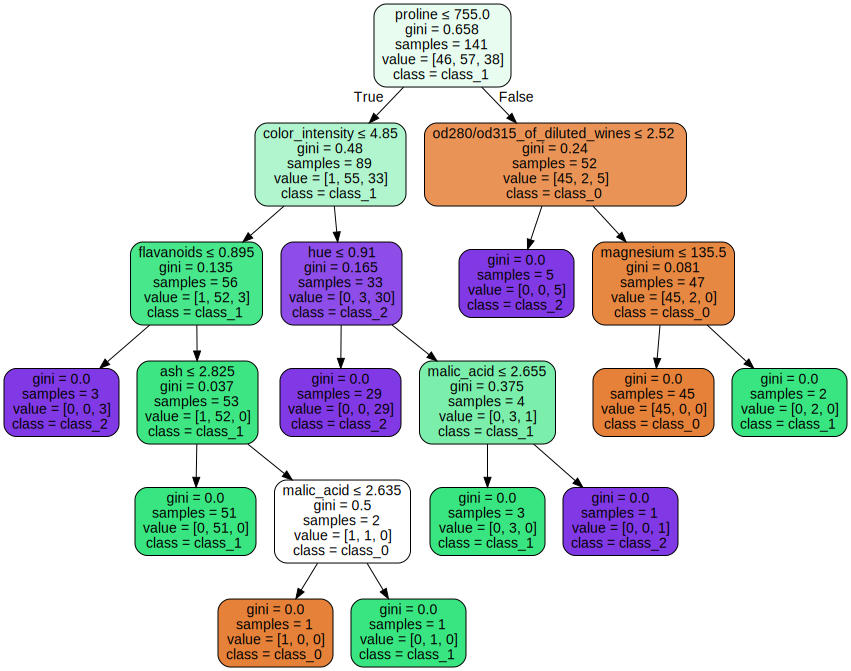

In [61]:
dot_data = tree.export_graphviz(clf_w, out_file=None, 
                         feature_names=wine.feature_names,  
                         class_names=wine.target_names,  
                         filled=True, rounded=True,  
                         special_characters=True)  
graph = graphviz.Source(dot_data)  
graph 

In [62]:
pred_train_w = clf_w.predict(train_w[features_w])
pred_train_names_w = pd.Categorical.from_codes(pred_train_w, wine.target_names)
pd.crosstab(train_w['class'], pred_train_names_w, rownames=['Actual wine'], colnames=['Predicted wine'])

Predicted wine,class_0,class_1,class_2
Actual wine,,,
0,46,0,0
1,0,57,0
2,0,0,38


In [63]:
print("{:.2%}".format(accuracy_score(y_train_w, pred_train_w)))

100.00%


In [64]:
pred_test_w = clf_w.predict(test_w[features_w])
pred_test_names_w = pd.Categorical.from_codes(pred_test_w, wine.target_names)
pd.crosstab(test_w['class'], pred_test_names_w, rownames=['Actual wine'], colnames=['Predicted wine'])

Predicted wine,class_0,class_1,class_2
Actual wine,,,
0,11,1,1
1,1,11,2
2,0,1,9


In [65]:
print("{:.2%}".format(accuracy_score(y_test_w, pred_test_w)))

83.78%


The accuracy scores show that the model is surely overfitting.

We now take a look the the importance of the different features :

Text(0.5, 1.0, 'Feature importance')

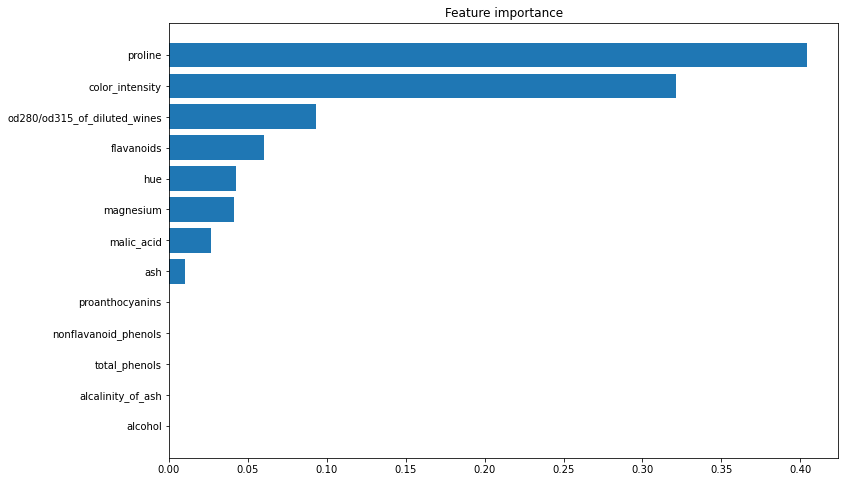

In [66]:
importances = clf_w.feature_importances_
indices = np.argsort(importances)
plt.figure(figsize=(12,8))
plt.barh(range(len(indices)), importances[indices], align='center')
plt.yticks(range(len(indices)), data_w.columns[indices])
plt.title('Feature importance')

We try now to reduce the overfitting effect by building a tree based on less features but more important ones : prolline and color_intensity. We now build a decision tree based on those 2 features :

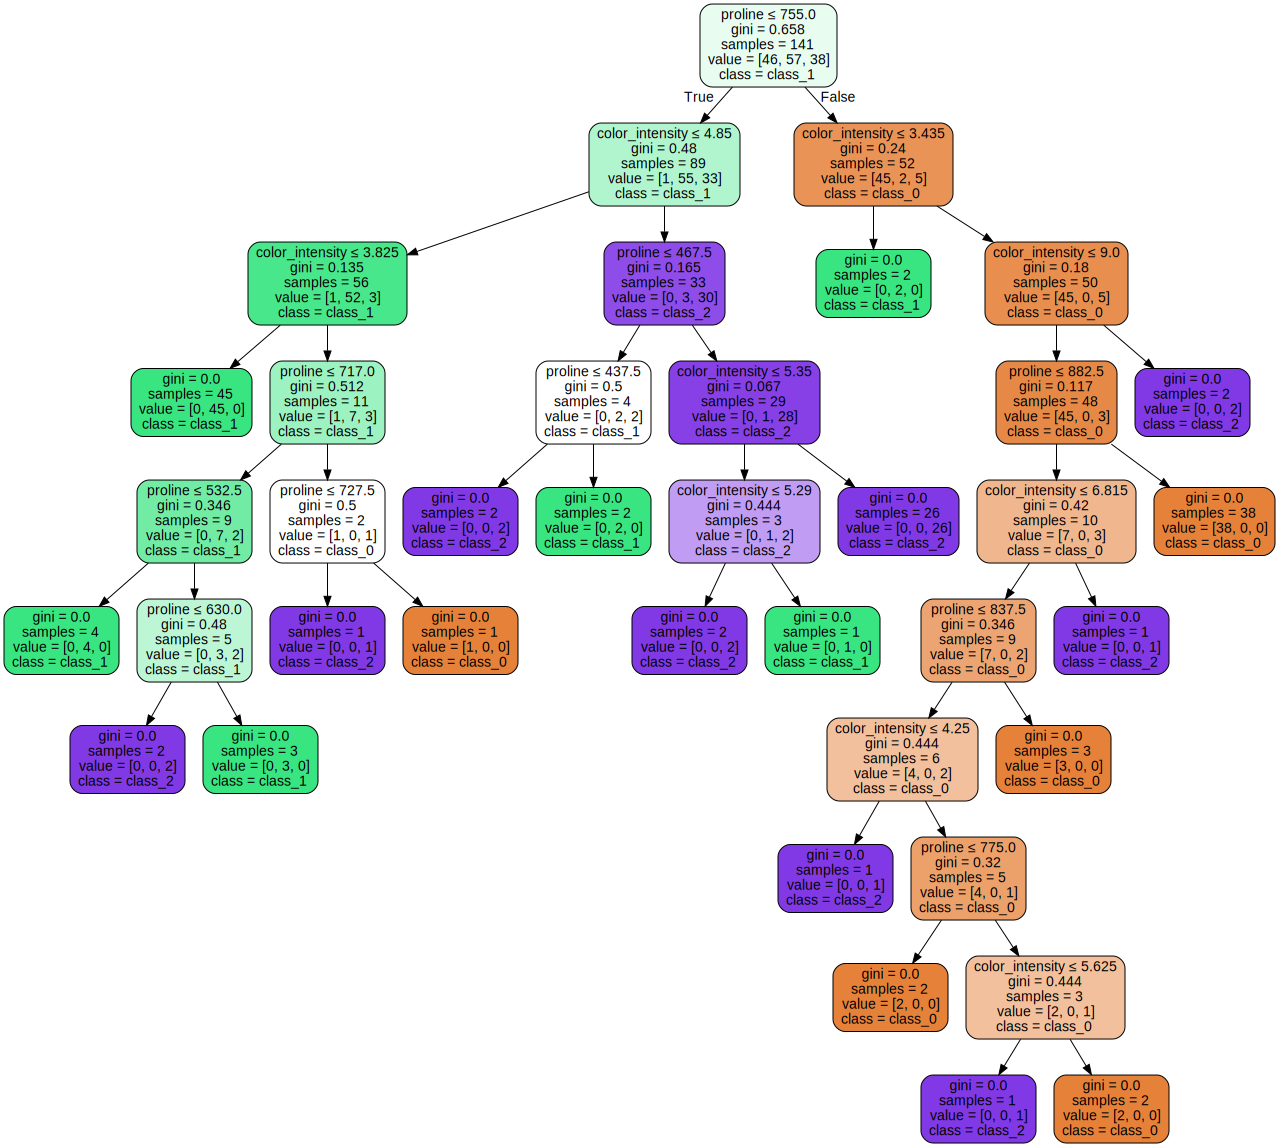

In [67]:
pci = data_w.columns[9::3]

clf_w_pci = tree.DecisionTreeClassifier()
clf_w_pci = clf_w_pci.fit(train_w[pci], y_train_w)

dot_data = tree.export_graphviz(clf_w_pci, out_file=None, 
                         feature_names=['color_intensity','proline'],  
                         class_names=wine.target_names,  
                         filled=True, rounded=True,  
                         special_characters=True)  
graph = graphviz.Source(dot_data)  
graph 

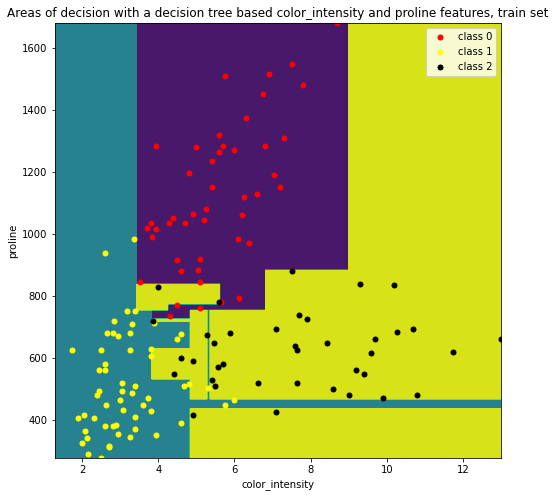

In [68]:
Nx1,Nx2 = 500,500

x1=np.linspace(min(data_w['color_intensity']),max(data_w['color_intensity']),Nx1)  # sampling of the x1 axis 
x2=np.linspace(min(data_w['proline']),max(data_w['proline']),Nx2) 
X1,X2=np.meshgrid(x1,x2) 
Z = clf_w_pci.predict(np.array([X1.ravel(), X2.ravel()]).T)
Z = Z.reshape(X1.shape)

plt.figure(figsize=(8, 8))
plt.contourf(X1,X2, Z)
plt.plot (train_w[train_w['class'] == 0]['color_intensity'].values,train_w[train_w['class'] == 0]['proline'].values, linestyle = 'none', marker = 'o', c = 'red', markersize = 5, label = 'class 0')
plt.plot (train_w[train_w['class'] == 1]['color_intensity'].values,train_w[train_w['class'] == 1]['proline'].values, linestyle = 'none', marker = 'o', c = 'yellow', markersize = 5, label = 'class 1')
plt.plot (train_w[train_w['class'] == 2]['color_intensity'].values,train_w[train_w['class'] == 2]['proline'].values, linestyle = 'none', marker = 'o', c = 'black', markersize = 5, label = 'class 2')
plt.xlabel('color_intensity')
plt.ylabel('proline')
plt.legend()
plt.title("Areas of decision with a decision tree based color_intensity and proline features, train set")
plt.show()

We still observe an overfitting model, but that the best 2D decision tree that we can build, based on the features importance.

In [69]:
pred_train_w = clf_w_pci.predict(train_w[pci])
pred_train_names_w = pd.Categorical.from_codes(pred_train_w, wine.target_names)
pd.crosstab(train_w['class'], pred_train_names_w, rownames=['Actual wine'], colnames=['Predicted wine'])

Predicted wine,class_0,class_1,class_2
Actual wine,,,
0,46,0,0
1,0,57,0
2,0,0,38


In [70]:
print("{:.2%}".format(accuracy_score(y_train_w, pred_train_w)))

100.00%


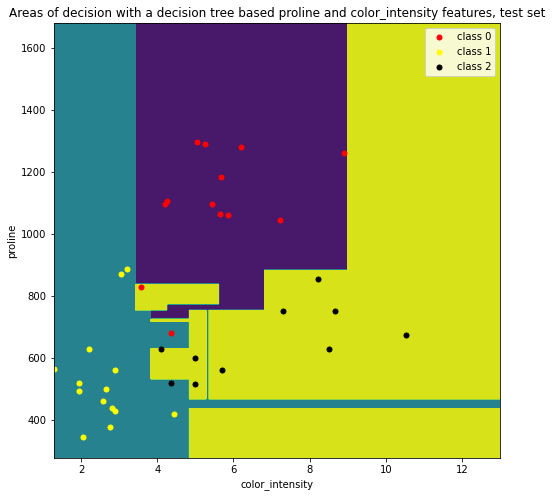

In [71]:
x1=np.linspace(min(data_w['color_intensity']),max(data_w['color_intensity']),Nx1)  # sampling of the x1 axis 
x2=np.linspace(min(data_w['proline']),max(data_w['proline']),Nx2) 
X1,X2=np.meshgrid(x1,x2) 
Z = clf_w_pci.predict(np.array([X1.ravel(), X2.ravel()]).T)
Z = Z.reshape(X1.shape)

plt.figure(figsize=(8, 8))
plt.contourf(X1,X2, Z)
plt.plot (test_w[test_w['class'] == 0]['color_intensity'].values,test_w[test_w['class'] == 0]['proline'].values, linestyle = 'none', marker = 'o', c = 'red', markersize = 5, label = 'class 0')
plt.plot (test_w[test_w['class'] == 1]['color_intensity'].values,test_w[test_w['class'] == 1]['proline'].values, linestyle = 'none', marker = 'o', c = 'yellow', markersize = 5, label = 'class 1')
plt.plot (test_w[test_w['class'] == 2]['color_intensity'].values,test_w[test_w['class'] == 2]['proline'].values, linestyle = 'none', marker = 'o', c = 'black', markersize = 5, label = 'class 2')
plt.xlabel('color_intensity')
plt.ylabel('proline')
plt.legend()
plt.title("Areas of decision with a decision tree based proline and color_intensity features, test set")
plt.show()

In [72]:
pred_test_w = clf_w_pci.predict(test_w[pci])
pred_test_names_w = pd.Categorical.from_codes(pred_test_w, wine.target_names)
pd.crosstab(test_w['class'], pred_test_names_w, rownames=['Actual wine'], colnames=['Predicted wine'])

Predicted wine,class_0,class_1,class_2
Actual wine,,,
0,11,1,1
1,0,14,0
2,0,1,9


In [73]:
print("{:.2%}".format(accuracy_score(y_test_w, pred_test_w)))

91.89%


Here, the accuracy is better if we only look at those two features. That shows that those 2 features offer the best generalization for the classification.

## Step 4: Random forests
Go to 

http://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html 

for a documentation about the `RandomForestClassifier` provided by `scikit-learn`.

Since target values must be integers, we first need to transform labels into numbers as below.

In [74]:
# train['species'] contains the actual species names. Before we can use it,
# we need to convert each species name into a digit. So, in this case there
# are three species, which have been coded as 0, 1, or 2.
y_train = pd.factorize(train['species'])[0]

# View target
y_train

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2], dtype=int64)

In [75]:
# Create a random forest Classifier. By convention, clf means 'Classifier'
rf = RandomForestClassifier(n_jobs=2, random_state=0, oob_score = True)

# Train the Classifier to take the training features and learn how they relate
# to the training y (the species)
rf.fit(train[features], y_train)
rf.oob_score_

0.9491525423728814

**Make predictions** and create actual english names for the plants for each predicted plant class:

In [76]:
preds = rf.predict(test[features])
preds_names = pd.Categorical.from_codes(preds, iris.target_names)
preds_names

['setosa', 'setosa', 'setosa', 'setosa', 'setosa', ..., 'virginica', 'virginica', 'virginica', 'virginica', 'virginica']
Length: 32
Categories (3, object): ['setosa', 'versicolor', 'virginica']

### Create a confusion matrix

In [77]:
# Create confusion matrix unsing pandas:
pd.crosstab(test['species'], preds_names, rownames=['Actual Species'], colnames=['Predicted Species'])

Predicted Species,setosa,versicolor,virginica
Actual Species,,,
setosa,13,0,0
versicolor,0,5,2
virginica,0,0,12


In [78]:
print("{:.2%}".format(accuracy_score(y_test, preds)))

93.75%


## Feature selection using random forests byproducts

One of the interesting use cases for random forest is feature selection. One of the byproducts of trying lots of decision tree variations is that you can examine which variables are working best/worst in each tree.

When a certain tree uses one variable and another doesn't, you can compare the value lost or gained from the inclusion/exclusion of that variable. The good random forest implementations are going to do that for you, so all you need to do is know which method or variable to look at.

### View feature importance
While we don't get regression coefficients like with ordinary least squares (OLS), we do get a score telling us how important each feature was in classifying. This is one of the most powerful parts of random forests, because we can clearly see that petal width was more important in classification than sepal width.


In [79]:
# View a list of the features and their importance scores
list(zip(train[features], rf.feature_importances_))

[('sepal length (cm)', 0.08474010289429795),
 ('sepal width (cm)', 0.022461263894393204),
 ('petal length (cm)', 0.4464851467243143),
 ('petal width (cm)', 0.4463134864869946)]

Text(0.5, 1.0, 'Feature importance')

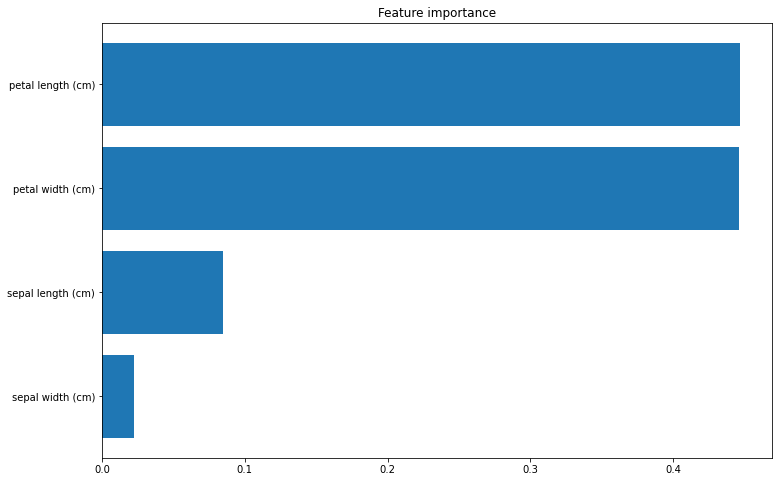

In [80]:
importances = rf.feature_importances_
indices = np.argsort(importances)
plt.figure(figsize=(12,8))
plt.barh(range(len(indices)), importances[indices], align='center')
plt.yticks(range(len(indices)), df.columns[indices])
plt.title('Feature importance')

## Exercise 3
1. Comment on the feature importances with respect to your previous observations on decision trees above.

2. Extract and visualize 5 trees belonging to the random forest using the attribute `estimators_` of the trained random forest classifier. Compare them. *Note that you may code a loop on extracted trees.*

3. Study the influence of parameters like `max_depth`, `min_samples_leaf` and `min_samples_split`. Try to optimize them and explain your approach and choices.

4. How is estimated the prediction error of a random forest ?
*Indication: have a look at parameter `oob_score`.*
What are out-of-bag samples ?

5. What should you do when classes are not balanced in the dataset ? (that is when there are much more examples of one class than another)

1. The feature importances with Random Forest give the same conclusion than our conclusion is previous exercises : petal features are the most discriminant ones.

In [81]:
arbres = []
for i in range(5):
    dot_data = tree.export_graphviz(rf.estimators_[i], out_file=None, 
                         feature_names=iris.feature_names[:4],  
                         class_names=iris.target_names,  
                         filled=True, rounded=True,  
                         special_characters=True)  
    arbres.append(graphviz.Source(dot_data))

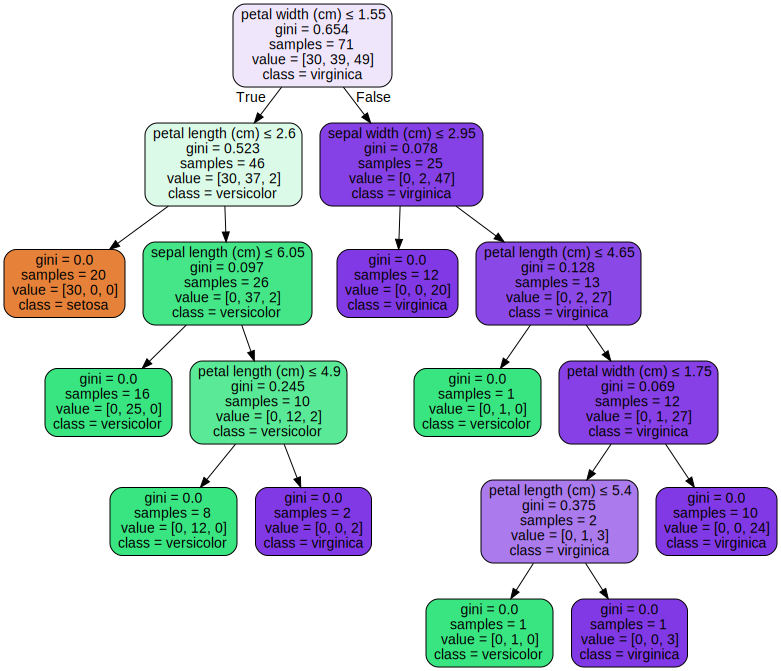

In [82]:
i = 0
arbres[i]

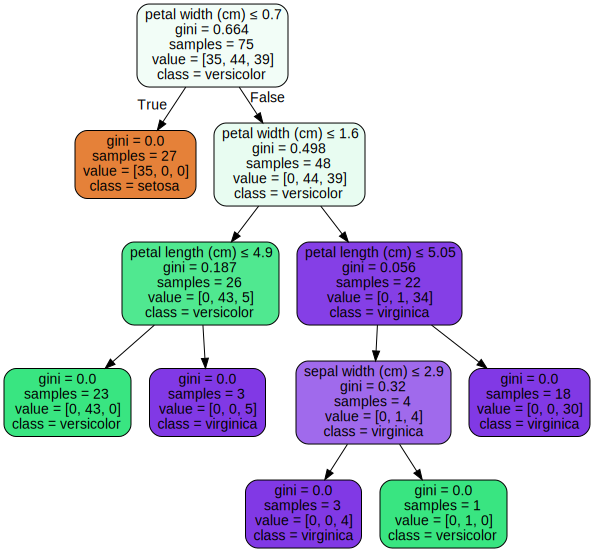

In [83]:
i+=1
arbres[i]

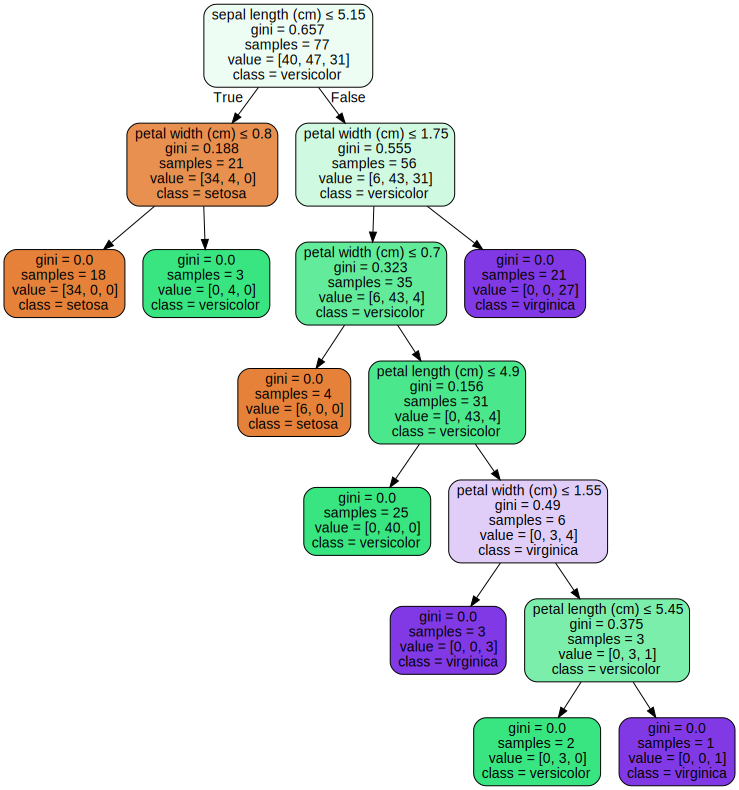

In [84]:
i+=1
arbres[i]

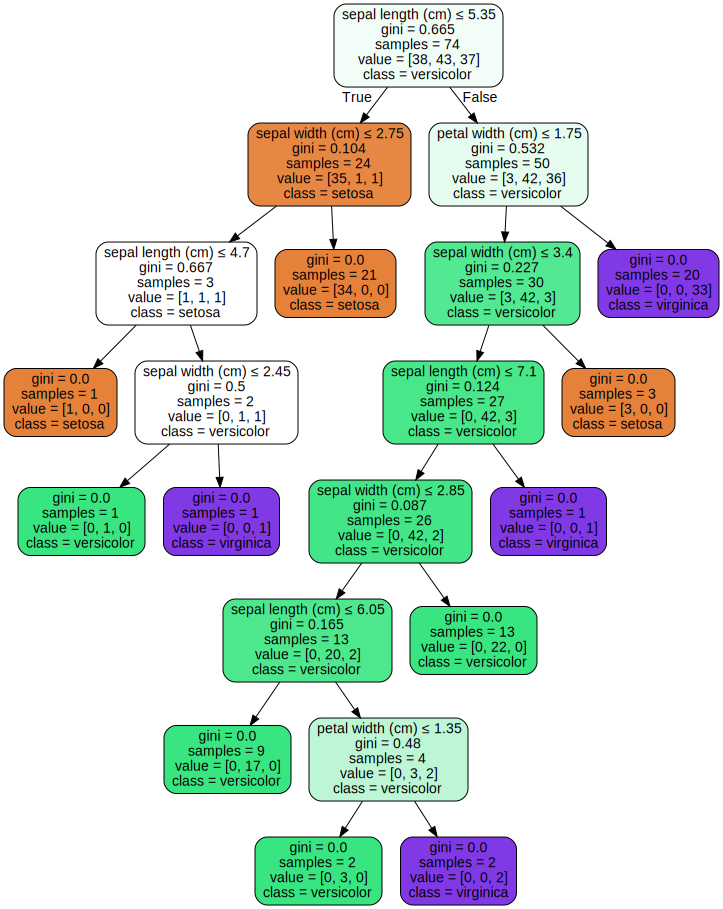

In [85]:
i+=1
arbres[i]

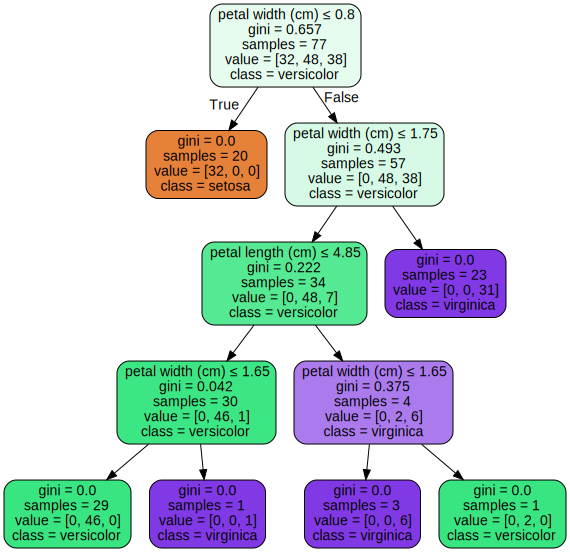

In [86]:
i+=1
arbres[i]

2. At the beginning of the different trees, the repartition between species is different. As a consequence, the trees start with a different question, depending on the initial repartition. Indeed, sometimes it concerns petal width, or sepal length. Hence, the trees are built differently : different shape and depth.

3. `max_depth` is the maximum depth of the tree. 
`min_samples_leaf` is the minimum number of samples required to be at a leaf node.
`min_samples_split` is the minimum number of samples required to split an internal node.

In [87]:
np.log2(len(train[features]))

6.882643049361842

The parameter max_depth has to be lower than 7.

We train the Random Forest with different values of the parameters, and we compute the accuracy score on training set and on test set. We want the accuracy score to be higher than 96%, on training set and test set, and we want to avoid overfitting, i.e. a very good accuracy score on training set and a lower score on test set.

In [88]:
depth = np.arange(1,8,1)
samples_leaf = [1,3,7]
samples_split = [0.5, 3, 7]
for i in range(len(depth)):
    for j in range (len(samples_leaf)):
        for k in range (len(samples_split)):
            rf = RandomForestClassifier(n_jobs=2, random_state=0, max_depth = depth[i], min_samples_leaf = samples_leaf[j], min_samples_split = samples_split[k])
            rf.fit(train[features], y_train)
            pred_train = rf.predict(train[features])
            pred_test = rf.predict(test[features])
            
            if accuracy_score(y_test, pred_test) > 0.96 and accuracy_score(y_train, pred_train) > 0.96 and accuracy_score(y_train, pred_train)-accuracy_score(y_test, pred_test) < 0.005 :
                print ('EXAMPLE OF GOOD RESULT : max_depth =', depth[i], 'min_samples_leaf =', samples_leaf[j], 'min_samples_split =', samples_split[k])
                print('Accuracy score on training set :', "{:.2%}".format(accuracy_score(y_train, pred_train)))
                print('Accuracy score on test set :', "{:.2%}".format(accuracy_score(y_test, pred_test)))
            
            if accuracy_score(y_test, pred_test) > 0.96 and accuracy_score(y_train, pred_train) > 0.96 and accuracy_score(y_train, pred_train)-accuracy_score(y_test, pred_test) > 0.02 :
                print ('EXAMPLE OF OVERFITTING : max_depth =', depth[i], 'min_samples_leaf =', samples_leaf[j], 'min_samples_split =', samples_split[k])
                print('Accuracy score on training set :', "{:.2%}".format(accuracy_score(y_train, pred_train)))
                print('Accuracy score on test set :', "{:.2%}".format(accuracy_score(y_test, pred_test)))

EXAMPLE OF GOOD RESULT : max_depth = 3 min_samples_leaf = 3 min_samples_split = 3
Accuracy score on training set : 96.61%
Accuracy score on test set : 96.88%
EXAMPLE OF GOOD RESULT : max_depth = 3 min_samples_leaf = 3 min_samples_split = 7
Accuracy score on training set : 96.61%
Accuracy score on test set : 96.88%
EXAMPLE OF OVERFITTING : max_depth = 4 min_samples_leaf = 1 min_samples_split = 3
Accuracy score on training set : 99.15%
Accuracy score on test set : 96.88%


We have 2 choices of parameters which provide good results : 
- max_depth = 3, min_samples_leaf = 3, min_samples_split = 3
- max_depth = 3, min_samples_leaf = 3, min_samples_split = 7

4. The prediction error of a random forest is estimated with OOB score. Bagging uses subsampling with replacement to create training samples for the model to learn from. OOB error is the mean prediction error on each training sample, using only the trees that did not have this sample in their bootstrap sample.

5. When classes are not balanced, one should use the parameter : 'class_weight' of random forest and associate an important weight to classes containing a very low number of examples.

## Step 5: a small example of regression using random forests
Random forest is capable of learning without carefully crafted data transformations. Take the the $f(x) = \sin(x)$ function for example.

Create some fake data and add a little noise.

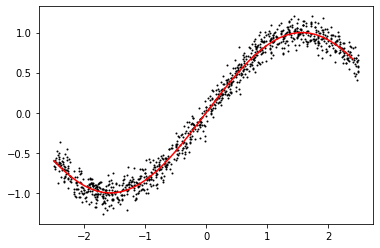

In [89]:
x = np.random.uniform(-2.5, 2.5, 1000)
y = np.sin(x) + np.random.normal(0, .1, 1000)

plt.plot(x,y,'ko',markersize=1,label='data')
plt.plot(np.arange(-2.5,2.5,0.1),np.sin(np.arange(-2.5,2.5,0.1)),'r-',label='ref')
plt.show()

If we try and build a basic linear model to predict y using x we end up with a straight line that sort of bisects the sin(x) function. Whereas if we use a random forest, it does a much better job of approximating the sin(x) curve and we get something that looks much more like the true function.

Based on this example, we will illustrate how the random forest isn't bound by linear constraints.

## Exercise 4
1. Apply random forests on this dataset for regression and compare performances with ordinary least squares regression.
*Note that ordinay least square regression is available thanks to:
from sklearn.linear_model import LinearRegression*

2. Comment on your results.

### Indications:
You may use half of points for training and others to test predictions. Then you will have an idea of how far the random forest predictor fits the sinus curve.

To this aim, you will need to use the model `RandomForestRegressor`. Be careful that when only 1 feature `x` is used as an input, you will need to reshape it by `x.reshape(-1,1)` when using methods `fit` and `predict`.

### Indication
One clever way to compare models when using `scikit-learn`is to make a loop on models as follows:


 

RandomForestRegressor(max_depth=4, n_estimators=30)


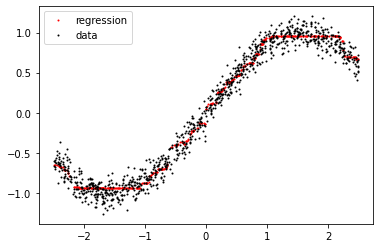

Coefficient of determination :  0.982

 

LinearRegression()


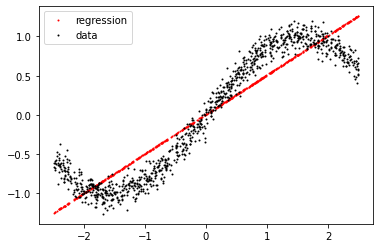

Coefficient of determination :  0.857


In [90]:
models = [RandomForestRegressor(n_estimators=30, max_depth=4),
          LinearRegression()]

for model in models:
    model.fit(x[0::2].reshape(-1, 1),y[0::2])

    pred = model.predict(x[1::2].reshape(-1, 1))
    plt.plot(x[1::2], pred, 'ro', markersize = 1, label = 'regression')
    plt.plot(x,y,'ko',markersize=1,label='data')
    plt.legend()
    print ('\n \n')
    print(model)
    plt.show()
    print('Coefficient of determination : ', round(model.score(x.reshape(-1, 1),y), 3))

With Random Forest, we obtain a curve that approximates well the sinus curve and the coefficient of determination is excellent (98%), whereas with linear regression we have a straight line that does not fit the curve. The coefficient of determination is lower (86%). This example shows the limits of simple methods such as linear regression compared to sophisticated machine learning techniques such as Random Forest.

## Documentation

### Decision trees
http://scikit-learn.org/stable/modules/tree.html

### Random forests
http://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html

### Plot decision surface : using `plt.contourf`
http://scikit-learn.org/stable/auto_examples/tree/plot_iris.html#sphx-glr-auto-examples-tree-plot-iris-py


## Pruning trees: not available in scikit-learn.
Since post-pruning of tree is not implemented in scikit-learn, you may think of coding your own pruning function. For instance, taking into account the numer of samples per leaf as proposed below:

In [91]:
# Pruning function (useful ?)
def prune(decisiontree, min_samples_leaf):
    if decisiontree.min_samples_leaf >= min_samples_leaf:
        raise Exception('Tree already more pruned')
    else:
        decisiontree.min_samples_leaf = min_samples_leaf
        tree = decisiontree.tree_
        for i in range(tree.node_count):
            n_samples = tree.n_node_samples[i]
            if n_samples <= min_samples_leaf:
                tree.children_left[i]=-1
                tree.children_right[i]=-1
                

### Pruning with sepal features

We keep the entropy criterion, because our results are better with that criterion. As we mentioned previously, overfitting is important with sepal features. The objective is to try to reduce this overfitting with pruning.

In [92]:
clf_sepal = tree.DecisionTreeClassifier(criterion = 'entropy')
clf_sepal = clf_sepal.fit(train[sepal], y_train)

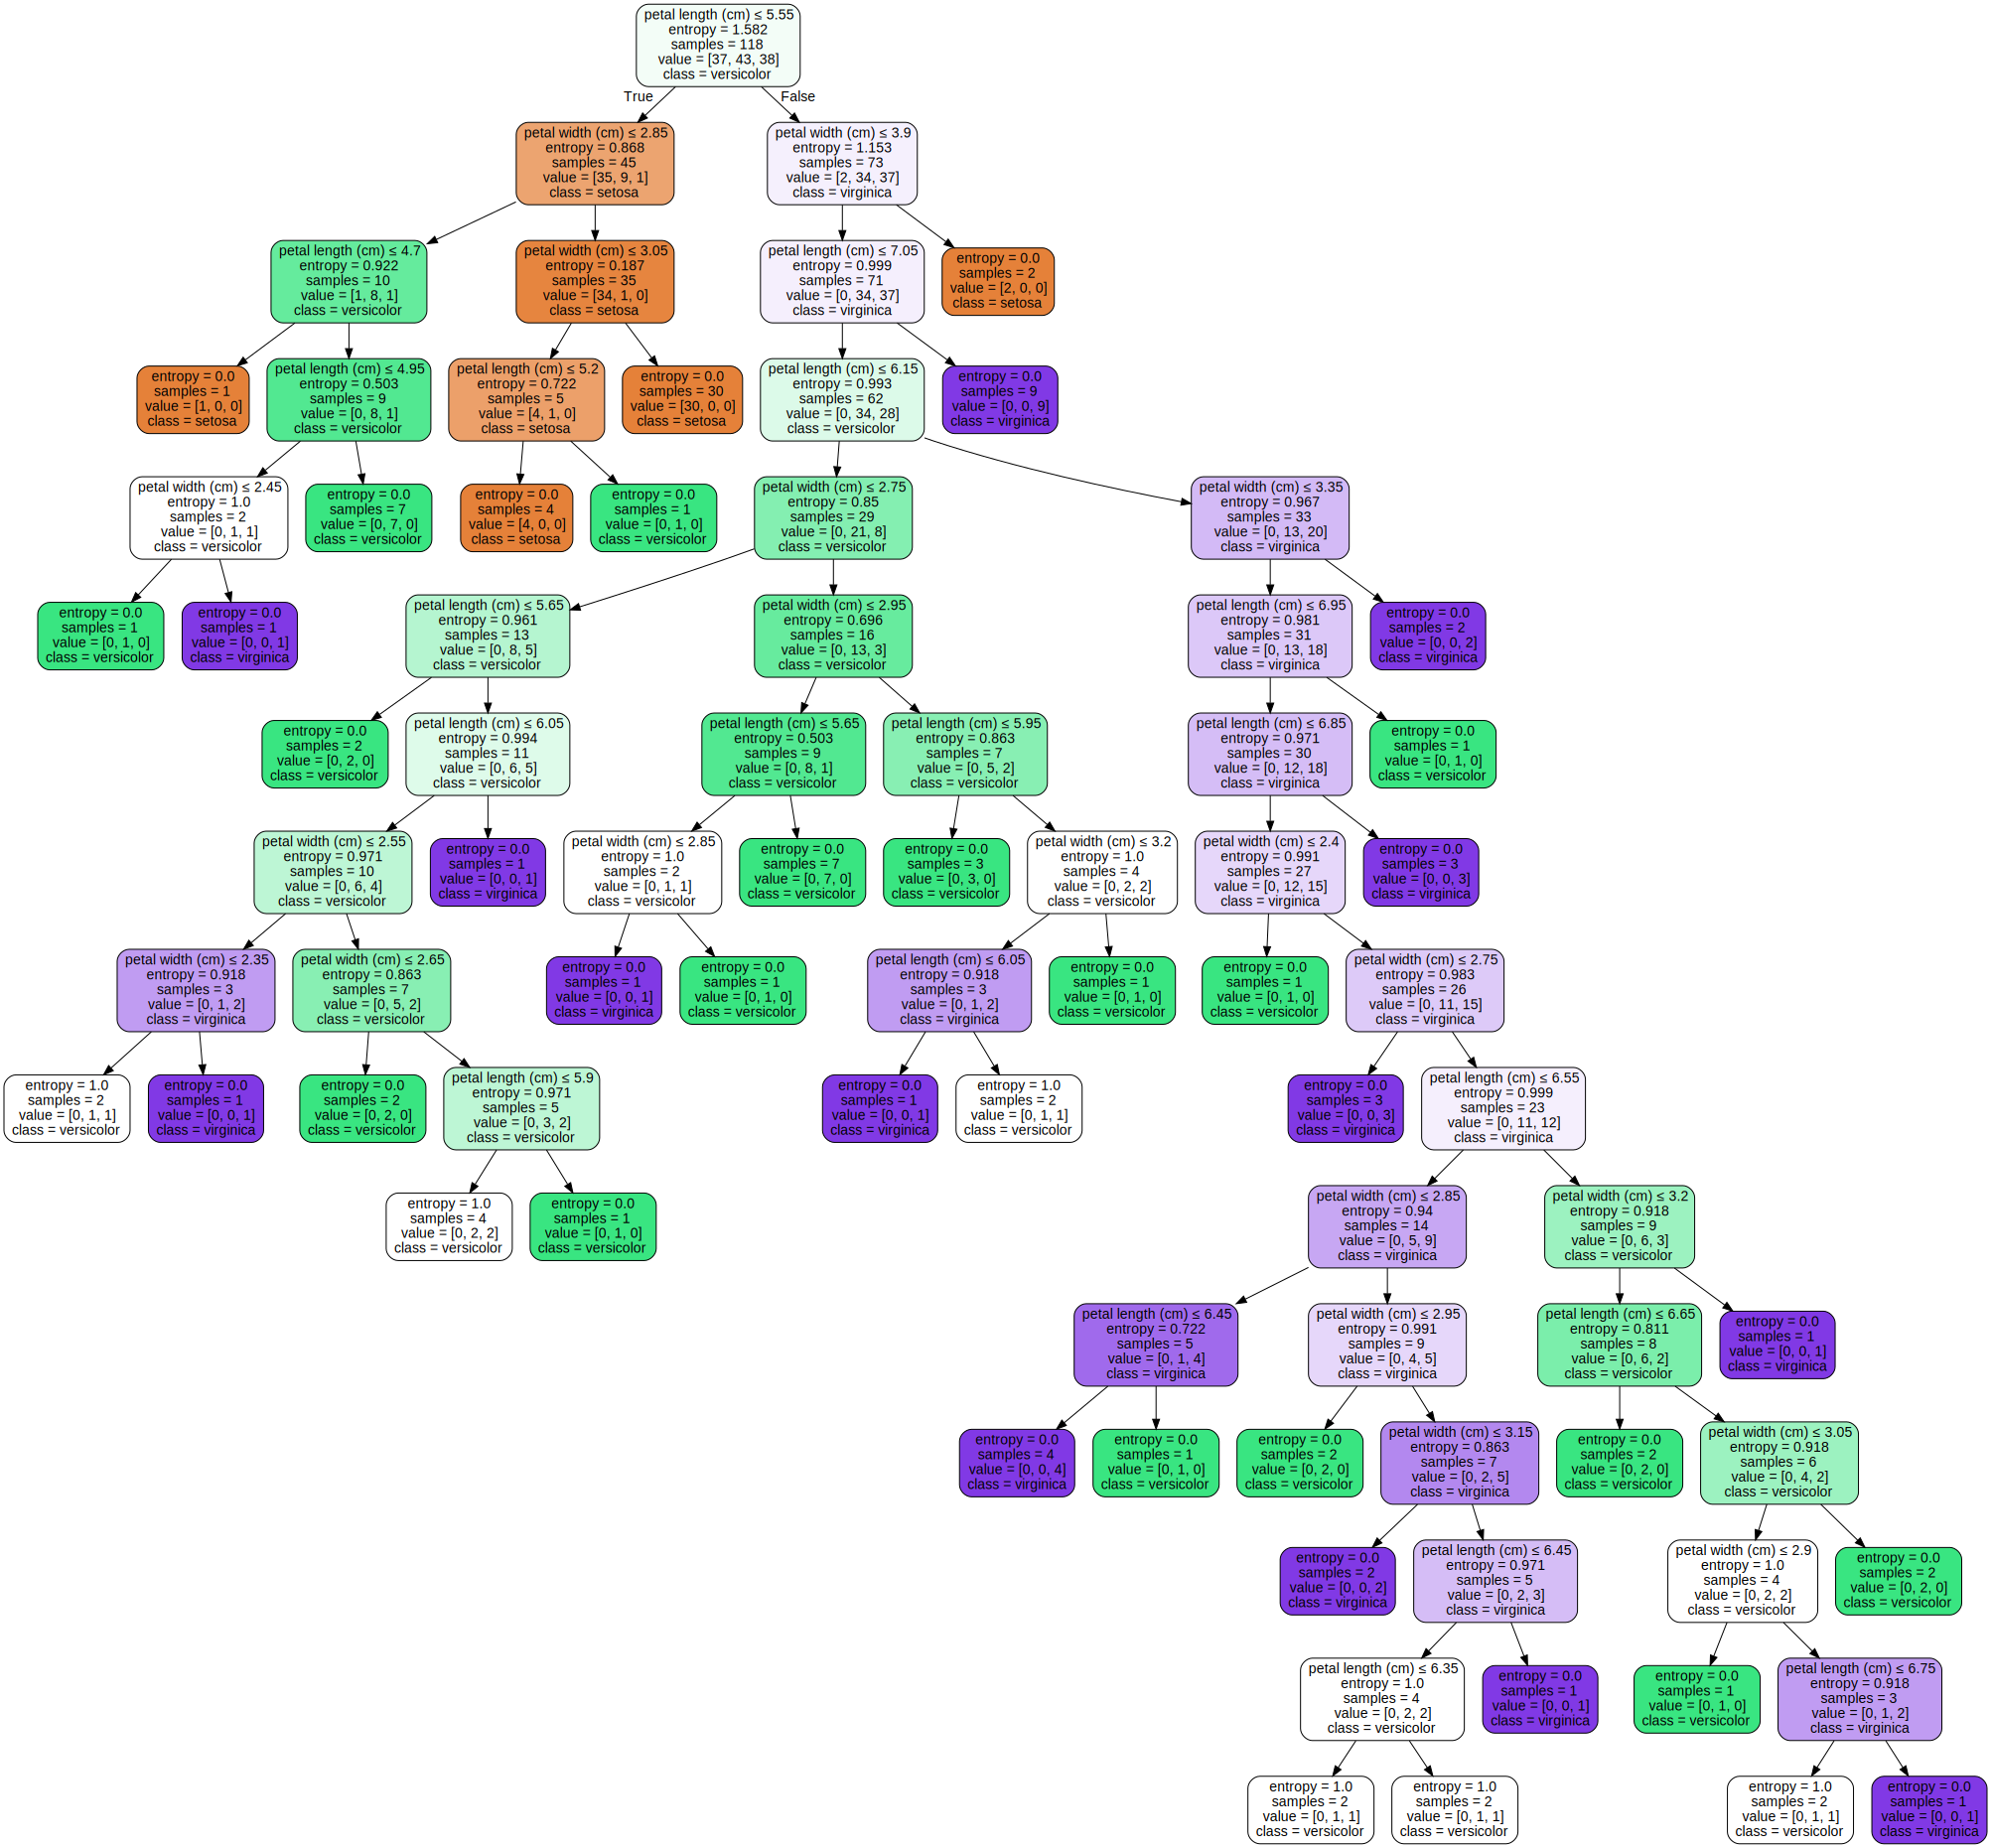

In [93]:
dot_data = tree.export_graphviz(clf_sepal, out_file=None, 
                         feature_names=iris.feature_names[2:],  
                         class_names=iris.target_names,  
                         filled=True, rounded=True,  
                         special_characters=True)  
graph = graphviz.Source(dot_data)  
graph 

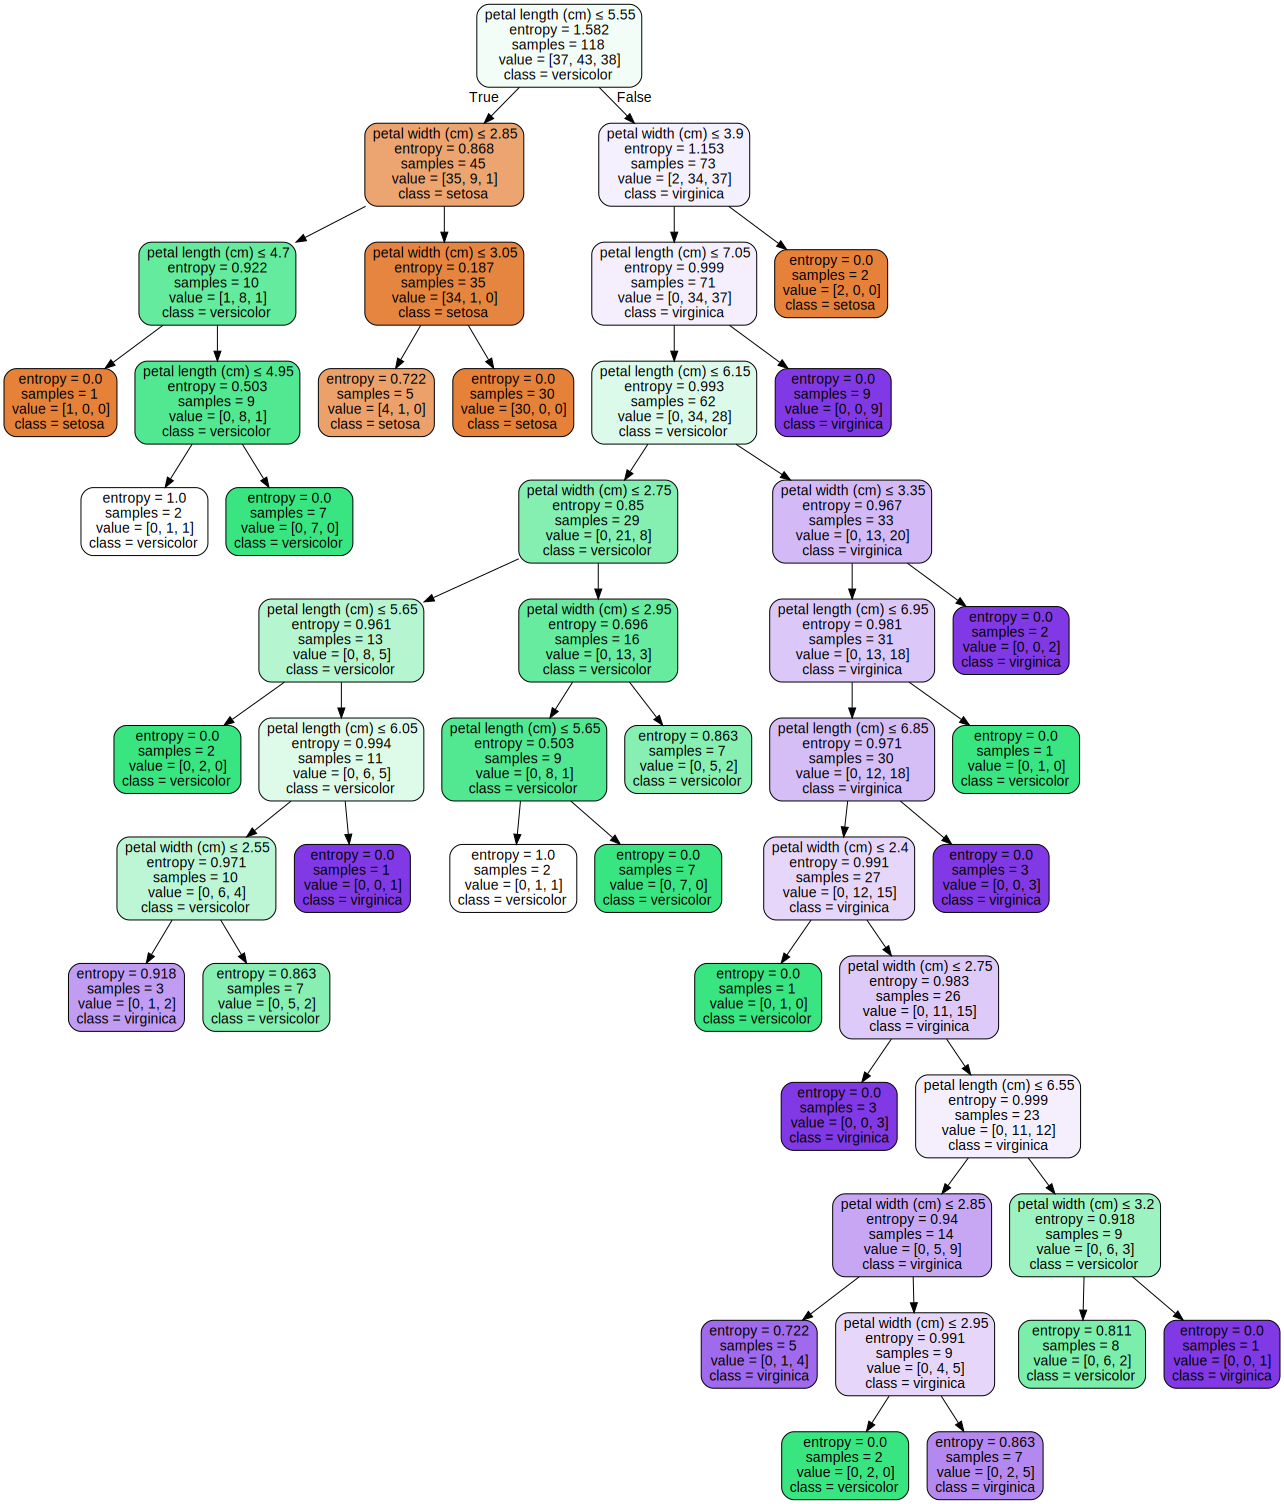

In [94]:
prune(clf_sepal, 8)
dot_data = tree.export_graphviz(clf_sepal, out_file=None, 
                         feature_names=iris.feature_names[2:],  
                         class_names=iris.target_names,  
                         filled=True, rounded=True,  
                         special_characters=True)  
graph = graphviz.Source(dot_data)  
graph 

We reduce the depth of the tree from 16 to 13 with pruning.

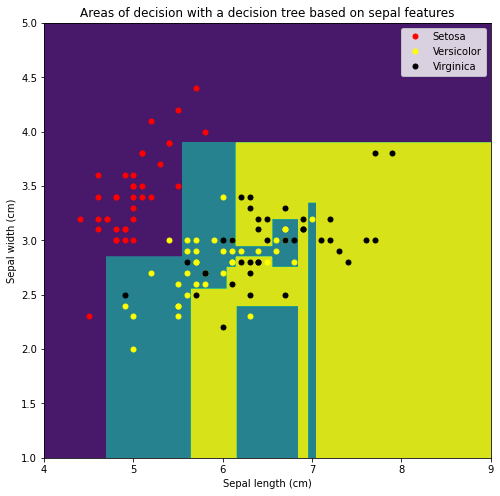

In [95]:
x1=np.linspace(4,9,Nx1)  # sampling of the x1 axis 
x2=np.linspace(1,5,Nx2) 
X1,X2=np.meshgrid(x1,x2) 
Z = clf_sepal.predict(np.array([X1.ravel(), X2.ravel()]).T)
Z = Z.reshape(X1.shape)

plt.figure(figsize=(8, 8))
plt.contourf(X1,X2, Z)
plt.plot (train[train['species'] == 'setosa']['sepal length (cm)'].values,train[train['species'] == 'setosa']['sepal width (cm)'].values, linestyle = 'none', marker = 'o', c = 'red', markersize = 5, label = 'Setosa')
plt.plot (train[train['species'] == 'versicolor']['sepal length (cm)'].values,train[train['species'] == 'versicolor']['sepal width (cm)'].values, linestyle = 'none', marker = 'o', c = 'yellow', markersize = 5, label = 'Versicolor')
plt.plot (train[train['species'] == 'virginica']['sepal length (cm)'].values,train[train['species'] == 'virginica']['sepal width (cm)'].values, linestyle = 'none', marker = 'o', c = 'black', markersize = 5, label = 'Virginica')
plt.xlabel('Sepal length (cm)')
plt.ylabel('Sepal width (cm)')
plt.legend()
plt.title("Areas of decision with a decision tree based on sepal features")
plt.show()

Areas of decision are more "connected" and there are less "islands". As we made the tree simpler, the areas are simpler as well.

In [96]:
pred_train = clf_sepal.predict(train[sepal])
pred_train_names = pd.Categorical.from_codes(pred_train, iris.target_names)
pd.crosstab(train['species'], pred_train_names, rownames=['Actual Species'], colnames=['Predicted Species'])

Predicted Species,setosa,versicolor,virginica
Actual Species,,,
setosa,37,0,0
versicolor,1,38,4
virginica,0,8,30


In [97]:
print("{:.2%}".format(accuracy_score(y_train, pred_train)))

88.98%


As the model is less sophisticated, it makes more errors on training set with pruning (89% accuracy with pruning, 94% without pruning).

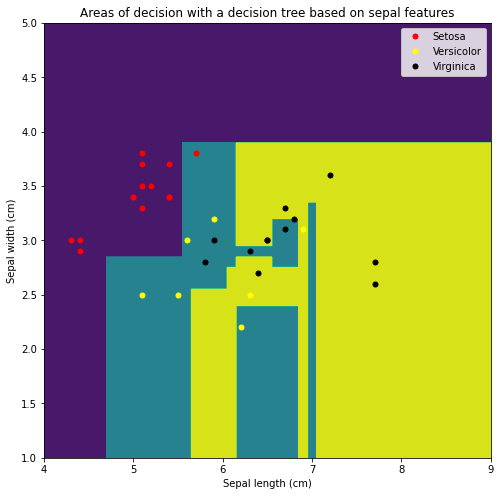

In [98]:
x1=np.linspace(4,9,Nx1)  # sampling of the x1 axis 
x2=np.linspace(1,5,Nx2) 
X1,X2=np.meshgrid(x1,x2) 
Z = clf_sepal.predict(np.array([X1.ravel(), X2.ravel()]).T)
Z = Z.reshape(X1.shape)

plt.figure(figsize=(8, 8))
plt.contourf(X1,X2, Z)
plt.plot (test[test['species'] == 'setosa']['sepal length (cm)'].values,test[test['species'] == 'setosa']['sepal width (cm)'].values, linestyle = 'none', marker = 'o', c = 'red', markersize = 5, label = 'Setosa')
plt.plot (test[test['species'] == 'versicolor']['sepal length (cm)'].values,test[test['species'] == 'versicolor']['sepal width (cm)'].values, linestyle = 'none', marker = 'o', c = 'yellow', markersize = 5, label = 'Versicolor')
plt.plot (test[test['species'] == 'virginica']['sepal length (cm)'].values,test[test['species'] == 'virginica']['sepal width (cm)'].values, linestyle = 'none', marker = 'o', c = 'black', markersize = 5, label = 'Virginica')
plt.xlabel('Sepal length (cm)')
plt.ylabel('Sepal width (cm)')
plt.legend()
plt.title("Areas of decision with a decision tree based on sepal features")
plt.show()

In [99]:
pred_test = clf_sepal.predict(test[sepal])
pred_test_names = pd.Categorical.from_codes(pred_test, iris.target_names)
pd.crosstab(test['species'], pred_test_names, rownames=['Actual Species'], colnames=['Predicted Species'])

Predicted Species,setosa,versicolor,virginica
Actual Species,,,
setosa,12,1,0
versicolor,0,5,2
virginica,0,4,8


In [100]:
print("{:.2%}".format(accuracy_score(y_test, pred_test)))

78.12%


The performance on test set has not been reduced. So we reduced overfitting with pruning, without affecting the performances of the model.

### Pruning with petal features

In [101]:
clf_petal = tree.DecisionTreeClassifier()
clf_petal = clf_petal.fit(train[petal], y_train)

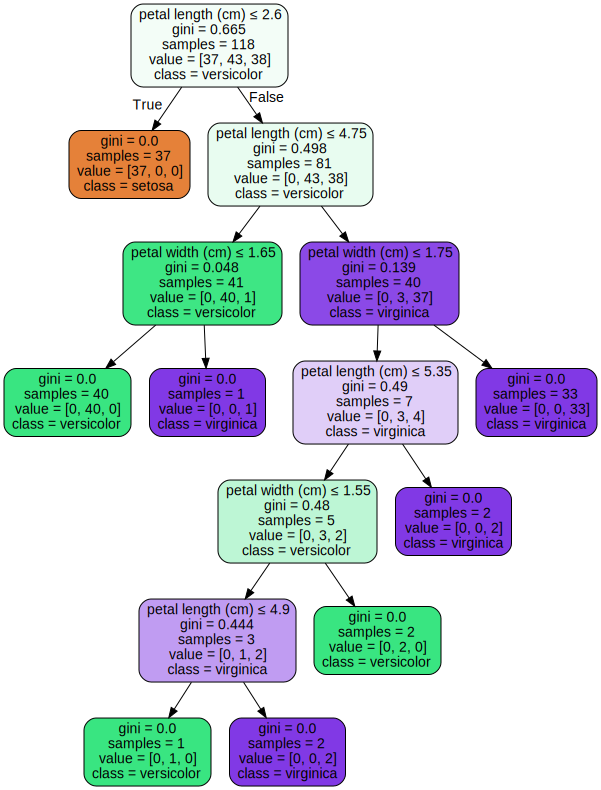

In [102]:
dot_data = tree.export_graphviz(clf_petal, out_file=None, 
                         feature_names=iris.feature_names[2:],  
                         class_names=iris.target_names,  
                         filled=True, rounded=True,  
                         special_characters=True)  
graph = graphviz.Source(dot_data)  
graph 

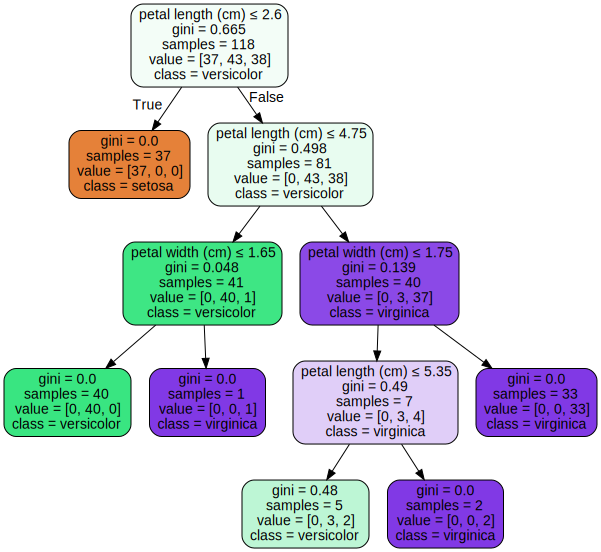

In [103]:
prune(clf_petal, 5)
dot_data = tree.export_graphviz(clf_petal, out_file=None, 
                         feature_names=iris.feature_names[2:],  
                         class_names=iris.target_names,  
                         filled=True, rounded=True,  
                         special_characters=True)  
graph = graphviz.Source(dot_data)  
graph 

We reduce the depth of the tree from 7 to 5 with pruning.

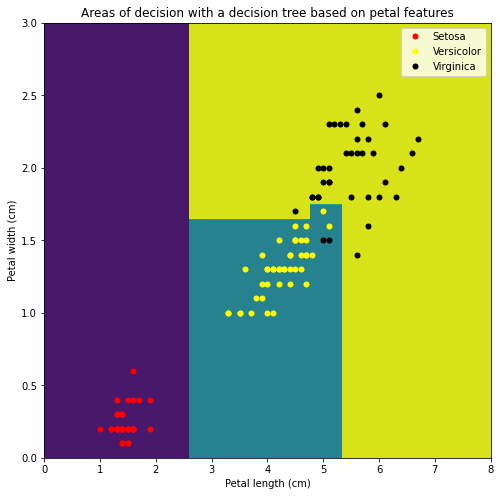

In [104]:
x1=np.linspace(0,8,Nx1)  # sampling of the x1 axis 
x2=np.linspace(0,3,Nx2) 
X1,X2=np.meshgrid(x1,x2) 
X1,X2=np.meshgrid(x1,x2) 
Z = clf_petal.predict(np.array([X1.ravel(), X2.ravel()]).T)
Z = Z.reshape(X1.shape)

plt.figure(figsize=(8, 8))
plt.contourf(X1,X2,Z)
plt.plot (train[train['species'] == 'setosa']['petal length (cm)'].values,train[train['species'] == 'setosa']['petal width (cm)'].values, linestyle = 'none', marker = 'o', c = 'red', markersize = 5, label = 'Setosa')
plt.plot (train[train['species'] == 'versicolor']['petal length (cm)'].values,train[train['species'] == 'versicolor']['petal width (cm)'].values, linestyle = 'none', marker = 'o', c = 'yellow', markersize = 5, label = 'Versicolor')
plt.plot (train[train['species'] == 'virginica']['petal length (cm)'].values,train[train['species'] == 'virginica']['petal width (cm)'].values, linestyle = 'none', marker = 'o', c = 'black', markersize = 5, label = 'Virginica')
plt.xlabel('Petal length (cm)')
plt.ylabel('Petal width (cm)')
plt.legend()
plt.title("Areas of decision with a decision tree based on petal features")
plt.show()

Areas of decisions are very basic with pruning.

In [105]:
pred_train = clf_petal.predict(train[petal])
pred_train_names = pd.Categorical.from_codes(pred_train, iris.target_names)
pd.crosstab(train['species'], pred_train_names, rownames=['Actual Species'], colnames=['Predicted Species'])

Predicted Species,setosa,versicolor,virginica
Actual Species,,,
setosa,37,0,0
versicolor,0,43,0
virginica,0,2,36


In [106]:
print("{:.2%}".format(accuracy_score(y_train, pred_train)))

98.31%


Without pruning, we did not make any error on training set. Now, with pruning, we make 2 errors.

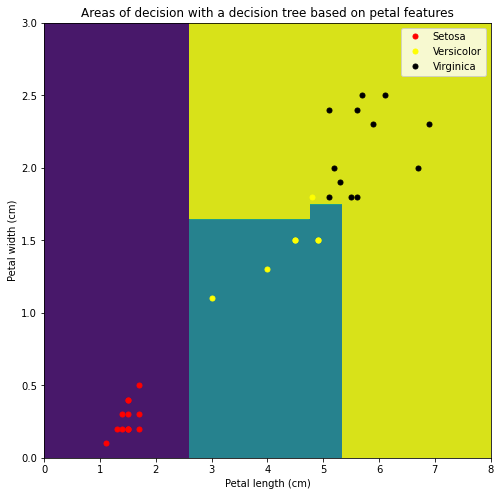

In [107]:
x1=np.linspace(0,8,Nx1)  # sampling of the x1 axis 
x2=np.linspace(0,3,Nx2) 
X1,X2=np.meshgrid(x1,x2) 
X1,X2=np.meshgrid(x1,x2) 
Z = clf_petal.predict(np.array([X1.ravel(), X2.ravel()]).T)
Z = Z.reshape(X1.shape)

plt.figure(figsize=(8, 8))
plt.contourf(X1,X2,Z)
plt.plot (test[test['species'] == 'setosa']['petal length (cm)'].values,test[test['species'] == 'setosa']['petal width (cm)'].values, linestyle = 'none', marker = 'o', c = 'red', markersize = 5, label = 'Setosa')
plt.plot (test[test['species'] == 'versicolor']['petal length (cm)'].values,test[test['species'] == 'versicolor']['petal width (cm)'].values, linestyle = 'none', marker = 'o', c = 'yellow', markersize = 5, label = 'Versicolor')
plt.plot (test[test['species'] == 'virginica']['petal length (cm)'].values,test[test['species'] == 'virginica']['petal width (cm)'].values, linestyle = 'none', marker = 'o', c = 'black', markersize = 5, label = 'Virginica')
plt.xlabel('Petal length (cm)')
plt.ylabel('Petal width (cm)')
plt.legend()
plt.title("Areas of decision with a decision tree based on petal features")
plt.show()

In [108]:
pred_test = clf_petal.predict(test[petal])
pred_test_names = pd.Categorical.from_codes(pred_test, iris.target_names)
pd.crosstab(test['species'], pred_test_names, rownames=['Actual Species'], colnames=['Predicted Species'])

Predicted Species,setosa,versicolor,virginica
Actual Species,,,
setosa,13,0,0
versicolor,0,6,1
virginica,0,0,12


In [109]:
print("{:.2%}".format(accuracy_score(y_test, pred_test)))

96.88%


The performance on test set is still the same, but we reduced overfitting.